# **IMPORT PACKAGE**

In [1]:
import pandas as pd
import datetime
import os

# **DATA DEFINITION**

Pada bagian ini, dipetakan keyword yang akan digunakan untuk proses scrapping (per lapangan usaha), berikut juga dengan batasan waktu dari artikel yang ingin diambil. Di Badan Pusat Statistik, terdapat 17 sektor lapangan usaha, meliputi:
1.	Pertanian, Kehutanan, dan Perikanan
2.	Pertambangan dan Penggalian
3.	Industri Pengolahan
4.	Pengadaan Listrik, Gas
5.	Pengadaan Air, Pengelolaan Sampah, Limbah dan Daur Ulang
6.	Konstruksi
7.	Perdagangan Besar dan Eceran, Reparasi Mobil dan Sepeda Motor
8.	Transportasi dan Pergudangan
9.	Penyediaan Akomodasi dan Makan Minum
10.	Informasi dan Komunikasi
11.	Jasa Keuangan dan Asuransi	
12.	Real Estat	
13.	Jasa Perusahaan
14.	Administrasi Pemerintahan, Pertahanan dan Jaminan Sosial Wajib
15.	Jasa Pendidikan
16.	Jasa Kesehatan dan Kegiatan Sosial
17.	Jasa lainnya

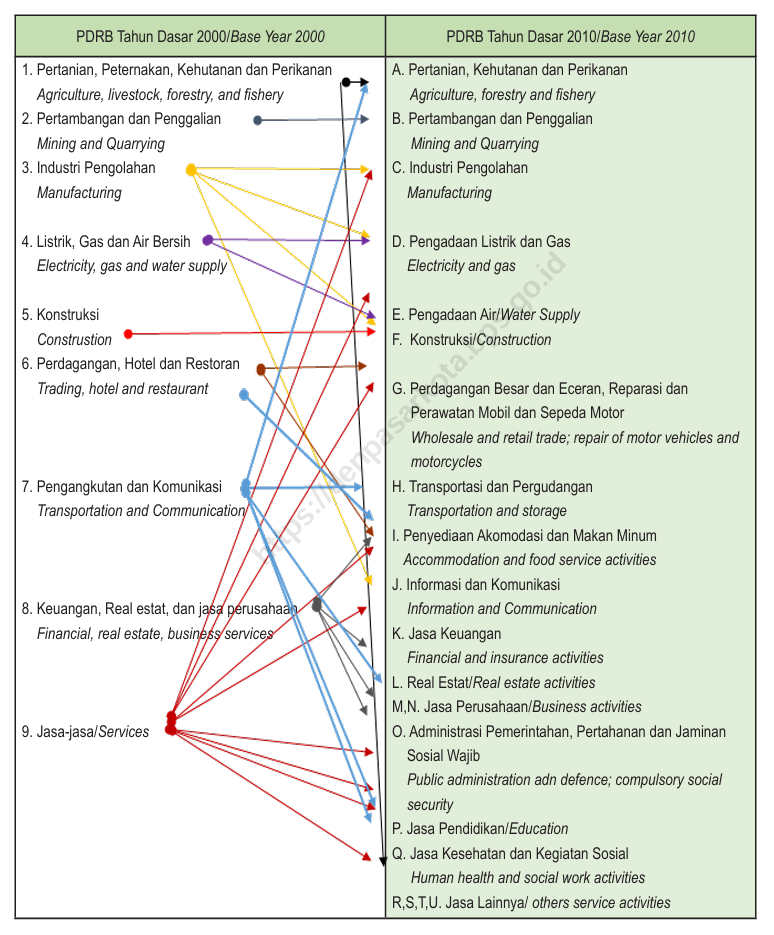

In [2]:
# Tentukan keywords dari masing-masing lapangan usaha
key_sektor = ['hotel','wisatawan','restoran','pantai','villa','okupansi']

keywords_scrap = key_sektor

# Tentukan rentang tanggal
start_date = datetime.date(2024, 10, 1)
end_date = datetime.date(2024, 11, 12)

# **SCRAPPING, PRE-CLEANING, & EXPORT (Scrapping BaliPost Lama)**

## 1. BaliPost

Fungsi dan package untuk scrapping di balipost ada pada kode di chunk berikut \
Aktifkan kalau pencarian di balipost sudah berjalan normal (saat kode ini dibuat sangat lambat)

In [3]:
# import requests
# from bs4 import BeautifulSoup
# import datetime
# import pandas as pd

# # Fungsi untuk melakukan scraping dari BaliPost
# def scrape_balipost(keyword, start_date, end_date, max_results, max_pages):
#     """
#     Fungsi untuk melakukan scraping artikel dari situs BaliPost berdasarkan keyword dan rentang tanggal.

#     Args:
#     - keyword (str): Keyword pencarian.
#     - start_date (datetime.date): Tanggal awal.
#     - end_date (datetime.date): Tanggal akhir.
#     - max_results (int): Maksimum jumlah artikel yang diambil.
#     - max_pages (int): Maksimum jumlah halaman yang diambil.

#     Returns:
#     - results (list): Daftar artikel yang berisi judul, link, tanggal, keyword, dan isi.
#     """
#     results = []

#     # Mengganti spasi dengan tanda "+" untuk keyword yang lebih dari satu kata
#     search_keyword = keyword.replace(" ", "+")
#     base_url = f"https://www.balipost.com/search/{search_keyword}"
#     current_page = 1

#     while len(results) < max_results and current_page <= max_pages:
#         url = f"{base_url}/page/{current_page}" if current_page > 1 else base_url
#         print(f"Scraping halaman {current_page} dari URL: {url}")
#         response = requests.get(url)

#         if response.status_code != 200:
#             print(f"Error saat mengakses halaman {current_page}. Status code: {response.status_code}")
#             break

#         soup = BeautifulSoup(response.content, "html.parser")
#         articles = soup.find_all("div", class_="td_module_10 td_module_wrap td-animation-stack")

#         if not articles:
#             print(f"Tidak ada artikel di halaman {current_page}, berhenti scraping.")
#             break

#         for article in articles:
#             title_element = article.find("h3", class_="entry-title td-module-title")
#             if title_element:
#                 title = title_element.text.strip()
#                 link = article.find("a")["href"]

#                 date_element = article.find("time", class_="entry-date updated td-module-date")
#                 if date_element:
#                     date_str = date_element["datetime"][:10]
#                     date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()

#                     # Cek apakah tanggal artikel dalam rentang yang diinginkan
#                     if not (start_date <= date <= end_date):
#                         continue

#                 content_element = article.find("div", class_="td-excerpt")
#                 content = content_element.text.strip() if content_element else ""

#                 results.append({"title": title, "keyword": keyword, "source": "BaliPost", "link": link, "date": date, "content": content})
#                 if len(results) >= max_results:
#                     break

#         pagination = soup.find("a", class_="page", title=str(current_page + 1))
#         if pagination:
#             current_page += 1
#         else:
#             break

#     return results


Memulai proses scrapping berita

In [4]:
# # Step 4: Scraping untuk setiap keyword
# # Takes a LOOOOOOOOOOOONG time

# all_news = []

# for keyword in keywords_scrap:
#     print(f"\nMemulai scraping untuk keyword: {keyword}")
#     news = scrape_balipost(keyword, start_date, end_date, max_results=25, max_pages=3)

#     # Tampilkan jumlah artikel yang berhasil diekstrak untuk keyword ini
#     num_articles = len(news)
#     print(f"Jumlah artikel yang diekstrak untuk keyword '{keyword}': {num_articles}")

#     all_news.extend(news)

# # Step 5: Simpan hasil ke dalam file Excel
# berita_balipost = pd.DataFrame(all_news)
# berita_balipost

In [5]:
# # Import melalui kode ini kalau sudah ada raw data scrapping BaliPost yang terpisah dari proses scrapping diatas (hanya untuk BaliPost)
# berita_balipost = pd.read_excel("C:/Users/asus/OneDrive/BPS/Neraca/berita_sektor9_triwulan4_bali.xlsx")
# berita_balipost

Pre-cleaning \
Hasil Scrapping BaliPost harus difilter terlebih dahulu wilayah (dari isi konten) dan judulnya (kadang tidak sesuai dengan kata yang diinginkan) \
Contoh: Kata kunci --> Ikan || Judul ditemukan --> DicarIKAN, DijanjIKAN

In [6]:
# # Keyword to filter out
# keywords_filter = ["TABANAN","SINGARAJA","DENPASAR","MANGUPURA","AMLAPURA","SEMARAPURA","NEGARA","GIANYAR","BANGLI"]

# # Build the condition for multiple keywords
# pattern = '|'.join(keywords_filter)  # Create a pattern that matches any of the keywords

# # Filter out rows where 'Description' contains the keyword
# berita_balipost_2 = pd.DataFrame(berita_balipost[berita_balipost['content'].str.contains(pattern, case=False, na=False)])

# # Show the filtered DataFrame
# print(berita_balipost_2.shape)
# berita_balipost_2

In [7]:
# # Build the regular expression pattern with word boundaries
# pattern_1 = r'\b(' + '|'.join(keywords_scrap) + r')\b'  # Ensures "Ikan" is a whole word

# # Filter rows where 'Title' contains the keyword as a whole word (case insensitive)
# berita_balipost_3 = berita_balipost_2[berita_balipost_2['title'].str.contains(pattern_1, case=False, na=False)]

# # Show the filtered DataFrame
# print(berita_balipost_3.shape)
# berita_balipost_3

In [8]:
# # Remove Duplication
# berita_balipost_3 = berita_balipost_3.drop_duplicates(subset='title', keep='first')
# print(berita_balipost_3.shape)
# berita_balipost_3

## 2. DetikBali

In [9]:
import math
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

# Define web scraping functions
# Fungsi untuk menuju ke portal berita
def search_url(query, date_start, date_end, pages_num=1):
    url = f"https://www.detik.com/search/searchnews?query={query}&siteid=123&sortby=time&fromdatex={date_start}&todatex={date_end}&page={pages_num}&result_type=relevansi"
    
    print(url)
    response = requests.get(url)
    page = bs(response.content, "html.parser")

    return page

# Fungsi untuk menghitung jumlah artikel di halaman terakhir
def last_page_article_count(query, date_start, date_end, page_num):
    last_page = search_url(query, date_start, date_end, page_num)
    article_list = last_page.find("div", {"class": "list-content"})

    if article_list:
        articles = article_list.find_all('article', class_='list-content__item')           
    article_count = len(articles)
    
    return article_count

def news_search_results(query, date_start, date_end):
    page = search_url(query, date_start, date_end)
    
    pagination = page.find("div", {"class": "pagination"})
    if pagination:
        page_numbers = pagination.find_all('a', class_='pagination__item')
        if page_numbers:
            last_page_number = int(page_numbers[-2].text)

        # Menghitung jumlah artikel di halaman terakhir
        last_page_articles = last_page_article_count(query, date_start, date_end, last_page_number)

        # Menghitung jumlah artikel yang diperoleh
        num = (last_page_number - 1) * 10 + last_page_articles
    else:
        num = 0
        last_page_number = 1
    
    return num, last_page_number

# Fungsi untuk mendapatkan isi konten
def news_get_content(article_url):
    response = requests.get(article_url)
    content_page = bs(response.content, "html.parser")

    content_list = []
    multiple_page = content_page.find("div", {"class": "detail__multiple"})
    if multiple_page:
        multiple_page = [x.get("href") for x in multiple_page.find_all("a")][:-1]
        for page in multiple_page:
            response = requests.get(page)
            content_page = bs(response.content, "html.parser")
            content_list.extend([p.get_text() for p in content_page.find_all("p") if not p.get_text().startswith('\n\n\n\nHalaman\n\n') and
                                p.get_text() not in ['',
                                                    '[Gambas:Instagram]',
                                                    '[Gambas:Video 20detik]',
                                                    '\r\nADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n',
                                                    '\r\n        SCROLL TO RESUME CONTENT\r\n  ',
                                                    'Selengkapnya di halaman selanjutnya.',
                                                    '\n\t\t\t\t\tAyo share cerita pengalaman dan upload photo album travelingmu di sini.\n\n\t\t\t\t\t\t\t\t\t\t\tSilakan Daftar atau Masuk\n']])
    else:
        content_list.extend([p.get_text() for p in content_page.find_all("p")
                            if p.get_text() not in ['',
                                                    '[Gambas:Instagram]',
                                                    '[Gambas:Video 20detik]',
                                                    '\r\nADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n',
                                                    '\r\n        SCROLL TO RESUME CONTENT\r\n  ',
                                                    '\n\t\t\t\t\tAyo share cerita pengalaman dan upload photo album travelingmu di sini.\n\n\t\t\t\t\t\t\t\t\t\t\tSilakan Daftar atau Masuk\n']])

    content_list = '\n\n'.join(content_list)

    return content_list

# Fungsi untuk mengecek berita yang merupakan advertorial
def news_advertorial_check(article_url):
    response = requests.get(article_url)
    content_page = bs(response.content, "html.parser")

    author = content_page.find("meta", {"content": "Advertorial"})

    return bool(author)

# Fungsi untuk mencari artikel dengan output adalah jumlah artikel dan halaman terakhir
def search_articles(query, from_date, to_date, ads_article, article_content):
    results_num, last_page = news_search_results(query, from_date, to_date)
        
    print(f"Result num: {results_num}")
    print(f"Last page: {last_page}")

    return results_num, last_page

# Fungsi untuk memperoleh list artikel
def articles_list(query, from_date, to_date, ads_article, article_content, num_articles, last_page):
    article_lists = []
    pages = math.ceil(num_articles / 10)
    
    print("\nMemulai Scrapping dari DetikBali untuk keyword:", query)
    for i in range(1, pages + 1):
        print("Scrapping halaman", i, "dari URL: ")
        page = search_url(query, from_date, to_date, i)
        articles = page.find_all("article", class_="list-content__item")

        for article in articles:
            title = article.find("a", {"class": "media__link"}).get('dtr-ttl')
            category = article.find('h2', class_='media__subtitle').text.strip()
            publish_date = article.find('span', title=True).get('title')
            article_url = article.find("a", {"class": "media__link"}).get('href')
                
            # print(f"Title: {title}")
            # print(f"Category: {category}")
            # print(f"Publish Date: {publish_date}")
            # print(f"Article URL: {article_url}")

            if ads_article and news_advertorial_check(article_url):
                continue
            else:
                if article_content:
                    content = news_get_content(article_url)
                    if (
                        any(title in existing_article["title"] for existing_article in article_lists) or 
                        any(content in existing_article["content"] for existing_article in article_lists)
                    ):
                        continue
                    else:
                        article_lists.append({
                            "title": title,
                            "keyword": query,
                            "source": category,
                            "link": article_url,
                            "date": publish_date,
                            "content": content
                        })
                else:
                    if any(title in existing_article["title"] for existing_article in article_lists):
                        continue
                    else:
                        article_lists.append({
                            "title": title,
                            "keyword": query,
                            "link": article_url,
                            "date": publish_date
                        })
            if len(article_lists) == num_articles:
                break
        if len(article_lists) == num_articles:
            break
            
    print(f"Jumlah artikel dengan kata kunci {keyword}: {len(article_lists)} artikel.")
    data = article_lists
    return data

In [10]:
# Scraping untuk setiap keyword
all_news_detik = []

for keyword in keywords_scrap:
    search_keyword = keyword.replace(" ", "+")
    news = articles_list(search_keyword, start_date.strftime('%d/%m/%Y'), end_date.strftime('%d/%m/%Y'), False, True, 25, 5)
    all_news_detik.extend(news)

# Simpan hasil ke dalam file Excel
berita_detik = pd.DataFrame(all_news_detik) 
berita_detik


Memulai Scrapping dari DetikBali untuk keyword: hotel
Scrapping halaman 1 dari URL: 
https://www.detik.com/search/searchnews?query=hotel&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=1&result_type=relevansi
Scrapping halaman 2 dari URL: 
https://www.detik.com/search/searchnews?query=hotel&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=2&result_type=relevansi
Scrapping halaman 3 dari URL: 
https://www.detik.com/search/searchnews?query=hotel&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=3&result_type=relevansi
Jumlah artikel dengan kata kunci hotel: 25 artikel.

Memulai Scrapping dari DetikBali untuk keyword: wisatawan
Scrapping halaman 1 dari URL: 
https://www.detik.com/search/searchnews?query=wisatawan&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=1&result_type=relevansi
Scrapping halaman 2 dari URL: 
https://www.detik.com/search/searchnews?query=wisatawan&siteid=123&sortby=time&fromdatex=01/10/2024

title   keyword     source  \
0    Hotel-hotel di NTB Terdampak Pemangkasan Perja...     hotel  detikBali   
1    Lombok Raya Hotel Mataram Dijaga Ketat Jelang ...     hotel  detikBali   
2    PHRI Bali Sayangkan Kebijakan Pangkas Perjalan...     hotel  detikBali   
3                      10 Rekomendasi Hotel di Sumbawa     hotel  detikBali   
4    Masakan Bali Makin Digemari Bule, Chef Hotel B...     hotel  detikBali   
..                                                 ...       ...        ...   
113  Peluang Karier Admin di Bali! Temukan Lowongan...     villa  detikBali   
114  Investor Mutiara Hadir di Mandalika, Lamar Pac...     villa  detikBali   
115  Pria Jember Tewas Setelah Dikejar Geng Motor, ...     villa  detikBali   
116  Hotel-hotel di NTB Terdampak Pemangkasan Perja...  okupansi  detikBali   
117  BPS Catat 616.641 Turis Asing Kunjungi Bali pa...  okupansi  detikBali   

                                                  link  \
0    https://www.detik.com/bali/bisnis/d-7634776/ho...   
1    https://www.detik.com/bali/pilkada/d-7629207/l...   
2    https://www.detik.com/bali/bisnis/d-7635245/ph...   
3    https://www.detik.com/bali/wisata/d-7574689/10...   
4    https://www.detik.com/bali/kuliner/d-7615074/m...   
..                                                 ...   
113  https://www.detik.com/bali/berita/d-7595979/pe...   
114  https://www.detik.com/bali/bisnis/d-7625359/in...   
115  https://www.detik.com/bali/hukum-dan-kriminal/...   
116  https://www.detik.com/bali/bisnis/d-7634776/ho...   
117  https://www.detik.com/bali/berita/d-7566892/bp...   

                              date  \
0    Selasa, 12 Nov 2024 14:48 WIB   
1     Jumat, 08 Nov 2024 18:17 WIB   
2    Selasa, 12 Nov 2024 18:27 WIB   
3     Senin, 07 Okt 2024 06:30 WIB   
4     Kamis, 31 Okt 2024 10:01 WIB   
..                             ...   
113   Sabtu, 19 Okt 2024 23:34 WIB   
114    Rabu, 06 Nov 2024 15:40 WIB   
115    Rabu, 16 Okt 2024 07:06 WIB   
116  Selasa, 12 Nov 2024 14:48 WIB   
117  Selasa, 01 Okt 2024 15:52 WIB   

                                               content  
0    Sejumlah hotel di Nusa Tenggara Barat (NTB) te...  
1    Debat terbuka kedua Pemilihan Gubernur (Pilgub...  
2    Ketua Perhimpunan Hotel dan Restoran Indonesia...  
3    Sumbawa, Nusa Tenggara Barat (NTB), menawarkan...  
4    Masakan nusantara, termasuk masakan Bali, bela...  
..                                                 ...  
113  detikBali berusaha menyediakan informasi lowon...  
114  Indonesia Tourism Development Corporation (ITD...  
115  Perkara tewasnya pria asal Jember, Jawa Timur,...  
116  Sejumlah hotel di Nusa Tenggara Barat (NTB) te...  
117  Badan Pusat Statistik (BPS) Provinsi Bali menc...  

[118 rows x 6 columns]

Pre-cleaning

In [11]:
# Filter Wilayah
keywords_filter = ["Tabanan","Singaraja","Denpasar","Badung","Karangasem","Klungkung","Jembrana","Gianyar","Bangli"]

# Build the condition for multiple keywords
pattern = '|'.join(keywords_filter)  # Create a pattern that matches any of the keywords

# Filter out rows where 'Description' contains the keyword
berita_detik_2 = pd.DataFrame(berita_detik[berita_detik['content'].str.contains(pattern, case=False, na=False)])

# Show the filtered DataFrame
print(berita_detik_2.shape)
berita_detik_2

(56, 6)


title    keyword     source  \
2    PHRI Bali Sayangkan Kebijakan Pangkas Perjalan...      hotel  detikBali   
4    Masakan Bali Makin Digemari Bule, Chef Hotel B...      hotel  detikBali   
7    WN Australia Tewas di Bak Mandi Hotel Pullman ...      hotel  detikBali   
8    Soal Bagi Hasil Pajak Hotel dan Restoran, Giri...      hotel  detikBali   
9    Perusahaan Cucu Soeharto Pinjam Duit Rp 500 M ...      hotel  detikBali   
12   Pungutan Turis Asing US$ 10 di Bali Akan Dikut...      hotel  detikBali   
19   KLH Akan Buat Aturan Sampah Hotel dan Restoran...      hotel  detikBali   
20   Mulia-PAS dan Koster-Giri Adu Solusi soal Kris...      hotel  detikBali   
22   Kala Masalah Piala Dunia U20 hingga Krisis Air...      hotel  detikBali   
24     Solusi Macet Ubud dari Mahayastra dan Kakarsana      hotel  detikBali   
29   Mulia-PAS Akan Buat Aplikasi 'Bali Mulia' untu...  wisatawan  detikBali   
30   DPRD Badung Dorong Penanganan Lampu Jalan Kerj...  wisatawan  detikBali   
33   Erupsi Gunung Lewotobi Laki-laki, Penutupan Ba...  wisatawan  detikBali   
36   Menikmati Jajanan Tradisional Laklak Khas Baka...  wisatawan  detikBali   
41   Koster Klaim Turyapada Tower Hasilkan Rp 100 M...  wisatawan  detikBali   
43   Mulia-PAS Sebut Dana Pusat Akan Banyak ke Bali...  wisatawan  detikBali   
44   Subak Spirit Festival 2024 Jadi Ajang Pelestar...  wisatawan  detikBali   
50   38 Kali Tipu Restoran dengan Transfer Fiktif, ...   restoran  detikBali   
51     Greenkubu, Restoran Nuansa Alam di Gianyar Bali   restoran  detikBali   
52   Soal Bagi Hasil Pajak Hotel dan Restoran, Giri...   restoran  detikBali   
53   PHRI Bali Sayangkan Kebijakan Pangkas Perjalan...   restoran  detikBali   
55   Wajib Dicoba! Rekomendasi Pilihan 11 Restoran ...   restoran  detikBali   
56   Dapur Bali Mula: Restoran Tradisional di Bulel...   restoran  detikBali   
61   Mahendra Pastikan Bandara Bali Utara Jadi Diba...   restoran  detikBali   
62   KLH Akan Buat Aturan Sampah Hotel dan Restoran...   restoran  detikBali   
63   AHY Pelajari Rencana Pembangunan Bandara Bali ...   restoran  detikBali   
64   Sinyal Terwujudnya Bandara Bali Utara dari Men...   restoran  detikBali   
65   Prabowo Doakan Mulia-PAS Menangi Pilgub Bali, ...   restoran  detikBali   
66   Sedana Arta Bantah Tudingan Pembangunan Bangli...   restoran  detikBali   
67   Jokowi Ingatkan Cabup Suyasa Perhatikan Pariwi...   restoran  detikBali   
68   Tanggapi Kedatangan Prabowo ke Bali, Koster: S...   restoran  detikBali   
69   Prabowo Berkomitmen Bangun Bandara Buleleng, I...   restoran  detikBali   
70   Momen Prabowo dan Mayor Teddy Nyanyi 'Cucak Ro...   restoran  detikBali   
71   Tim Kampanye Yakin Suara Koster-Giri Tak Terpe...   restoran  detikBali   
72   Ambisi Prabowo Bangun Bandara Bali Utara yang ...   restoran  detikBali   
73   De Gadjah Jelaskan Maksud Prabowo soal New Sin...   restoran  detikBali   
74   Blusukan ke Pasar Badung, Kaesang Kampanyekan ...   restoran  detikBali   
79   Pelajar Sumedang yang Terseret Ombak Pantai Ke...     pantai  detikBali   
81   Pelajar Tewas Terseret Ombak di Pantai Kelingk...     pantai  detikBali   
84   Lagi, Bangkai Penyu Lekang Ditemukan Terdampar...     pantai  detikBali   
85   Stuja di Pantai, Kafe Estetik di Bali dengan P...     pantai  detikBali   
86   Siswa Studi Tur Asal Sumedang Hilang Terseret ...     pantai  detikBali   
87   Akademisi UGM Soroti Finns Beach Club yang Did...     pantai  detikBali   
90   Pantai Kelan Tampil dengan Wajah Baru, Warung ...     pantai  detikBali   
92   Bersih Pantai dan Tanam Koral Ramaikan Hari Ke...     pantai  detikBali   
94   Keluarkan Bau Busuk, Penyu Lekang Mati Terdamp...     pantai  detikBali   
95   Banana Boat Auditor KPK dan KKP Terbalik di Pa...     pantai  detikBali   
97   10 Rekomendasi Pantai Berpasir Putih di Nusa D...     pantai  detikBali   
98   Mengenal Proses Pembuatan Garam Tradisional Kh...     pantai  detikBali   
99   Pantai Cemongkak: Wisata Tersembunyi Tanpa B

In [12]:
# Build the regular expression pattern with word boundaries
pattern = r'\b(' + '|'.join(keywords_scrap) + r')\b'

# Filter rows where 'Title' contains the keyword as a whole word (case insensitive)
berita_detik_3 = berita_detik_2[berita_detik_2['title'].str.contains(pattern, case=False, na=False)]

# Show the filtered DataFrame
print(berita_detik_3.shape)
berita_detik_3

(26, 6)


C:\Users\asus\AppData\Local\Temp\ipykernel_31852\1307647291.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  berita_detik_3 = berita_detik_2[berita_detik_2['title'].str.contains(pattern, case=False, na=False)]


title    keyword     source  \
4    Masakan Bali Makin Digemari Bule, Chef Hotel B...      hotel  detikBali   
7    WN Australia Tewas di Bak Mandi Hotel Pullman ...      hotel  detikBali   
8    Soal Bagi Hasil Pajak Hotel dan Restoran, Giri...      hotel  detikBali   
9    Perusahaan Cucu Soeharto Pinjam Duit Rp 500 M ...      hotel  detikBali   
12   Pungutan Turis Asing US$ 10 di Bali Akan Dikut...      hotel  detikBali   
19   KLH Akan Buat Aturan Sampah Hotel dan Restoran...      hotel  detikBali   
29   Mulia-PAS Akan Buat Aplikasi 'Bali Mulia' untu...  wisatawan  detikBali   
50   38 Kali Tipu Restoran dengan Transfer Fiktif, ...   restoran  detikBali   
51     Greenkubu, Restoran Nuansa Alam di Gianyar Bali   restoran  detikBali   
52   Soal Bagi Hasil Pajak Hotel dan Restoran, Giri...   restoran  detikBali   
55   Wajib Dicoba! Rekomendasi Pilihan 11 Restoran ...   restoran  detikBali   
56   Dapur Bali Mula: Restoran Tradisional di Bulel...   restoran  detikBali   
62   KLH Akan Buat Aturan Sampah Hotel dan Restoran...   restoran  detikBali   
79   Pelajar Sumedang yang Terseret Ombak Pantai Ke...     pantai  detikBali   
81   Pelajar Tewas Terseret Ombak di Pantai Kelingk...     pantai  detikBali   
84   Lagi, Bangkai Penyu Lekang Ditemukan Terdampar...     pantai  detikBali   
85   Stuja di Pantai, Kafe Estetik di Bali dengan P...     pantai  detikBali   
86   Siswa Studi Tur Asal Sumedang Hilang Terseret ...     pantai  detikBali   
87   Akademisi UGM Soroti Finns Beach Club yang Did...     pantai  detikBali   
90   Pantai Kelan Tampil dengan Wajah Baru, Warung ...     pantai  detikBali   
92   Bersih Pantai dan Tanam Koral Ramaikan Hari Ke...     pantai  detikBali   
94   Keluarkan Bau Busuk, Penyu Lekang Mati Terdamp...     pantai  detikBali   
95   Banana Boat Auditor KPK dan KKP Terbalik di Pa...     pantai  detikBali   
97   10 Rekomendasi Pantai Berpasir Putih di Nusa D...     pantai  detikBali   
99   Pantai Cemongkak: Wisata Tersembunyi Tanpa Bia...     pantai  detikBali   
109  Perusahaan Cucu Soeharto Pinjam Duit Rp 500 M ...      villa  detikBali   

                                                  link  \
4    https://www.detik.com/bali/kuliner/d-7615074/m...   
7    https://www.detik.com/bali/berita/d-7576968/wn...   
8    https://www.detik.com/bali/pilkada/d-7614502/s...   
9    https://www.detik.com/bali/berita/d-7613349/pe...   
12   https://www.detik.com/bali/berita/d-7567550/pu...   
19   https://www.detik.com/bali/berita/d-7624715/kl...   
29   https://www.detik.com/bali/pilkada/d-7606151/m...   
50   https://www.detik.com/bali/hukum-dan-kriminal/...   
51   https://www.detik.com/bali/wisata/d-7583255/gr...   
52   https://www.detik.com/bali/pilkada/d-7614502/s...   
55   https://www.detik.com/bali/kuliner/d-7580348/w...   
56   https://www.detik.com/bali/kuliner/d-7572803/d...   
62   https://www.detik.com/bali/berita/d-7624715/kl...   
79   https://www.detik.com/bali/berita/d-7615462/pe...   
81   https://www.detik.com/bali/berita/d-7616660/pe...   
84   https://www.detik.com/bali/berita/d-7578544/la...   
85   https://www.detik.com/bali/wisata/d-7606891/st...   
86   https://www.detik.com/bali/berita/d-7614733/si...   
87   https://www.detik.com/bali/berita/d-7613894/ak...   
90   https://www.detik.com/bali/wisata/d-7586213/pa...   
92   https://www.detik.com/bali/wisata/d-7583254/be...   
94   https://www.detik.com/bali/berita/d-7577416/ke...   
95   https://www.detik.com/bali/berita/d-7605855/ba...   
97   https://www.detik.com/bali/wisata/d-7608035/10...   
99   https://www.detik.com/bali/wisata/d-7595315/pa...   
109  https://www.detik.com/bali/berita/d-7613349/pe...   

                              date  \
4     Kamis, 31 Okt 2024 10:01 WIB   
7     Senin, 07 Okt 2024 21:44 WIB   
8      Rabu, 30 Okt 2024 19:53 WIB   
9      Rabu, 30 Okt 2024 10:49 WIB   
12   Selasa, 01 Okt 2024 21:25 WIB   
19     Rabu, 06 Nov 2024 11:03 WIB   
29    Jumat, 25 Okt 2024 15:00 WIB   
50    Kamis, 07 N

Menghapus berita yang duplikat

In [13]:
# Remove Duplication
berita_detik_4 = berita_detik_3.drop_duplicates(subset='title', keep='first')
print(berita_detik_4.shape)
berita_detik_4

(23, 6)


title    keyword     source  \
4   Masakan Bali Makin Digemari Bule, Chef Hotel B...      hotel  detikBali   
7   WN Australia Tewas di Bak Mandi Hotel Pullman ...      hotel  detikBali   
8   Soal Bagi Hasil Pajak Hotel dan Restoran, Giri...      hotel  detikBali   
9   Perusahaan Cucu Soeharto Pinjam Duit Rp 500 M ...      hotel  detikBali   
12  Pungutan Turis Asing US$ 10 di Bali Akan Dikut...      hotel  detikBali   
19  KLH Akan Buat Aturan Sampah Hotel dan Restoran...      hotel  detikBali   
29  Mulia-PAS Akan Buat Aplikasi 'Bali Mulia' untu...  wisatawan  detikBali   
50  38 Kali Tipu Restoran dengan Transfer Fiktif, ...   restoran  detikBali   
51    Greenkubu, Restoran Nuansa Alam di Gianyar Bali   restoran  detikBali   
55  Wajib Dicoba! Rekomendasi Pilihan 11 Restoran ...   restoran  detikBali   
56  Dapur Bali Mula: Restoran Tradisional di Bulel...   restoran  detikBali   
79  Pelajar Sumedang yang Terseret Ombak Pantai Ke...     pantai  detikBali   
81  Pelajar Tewas Terseret Ombak di Pantai Kelingk...     pantai  detikBali   
84  Lagi, Bangkai Penyu Lekang Ditemukan Terdampar...     pantai  detikBali   
85  Stuja di Pantai, Kafe Estetik di Bali dengan P...     pantai  detikBali   
86  Siswa Studi Tur Asal Sumedang Hilang Terseret ...     pantai  detikBali   
87  Akademisi UGM Soroti Finns Beach Club yang Did...     pantai  detikBali   
90  Pantai Kelan Tampil dengan Wajah Baru, Warung ...     pantai  detikBali   
92  Bersih Pantai dan Tanam Koral Ramaikan Hari Ke...     pantai  detikBali   
94  Keluarkan Bau Busuk, Penyu Lekang Mati Terdamp...     pantai  detikBali   
95  Banana Boat Auditor KPK dan KKP Terbalik di Pa...     pantai  detikBali   
97  10 Rekomendasi Pantai Berpasir Putih di Nusa D...     pantai  detikBali   
99  Pantai Cemongkak: Wisata Tersembunyi Tanpa Bia...     pantai  detikBali   

                                                 link  \
4   https://www.detik.com/bali/kuliner/d-7615074/m...   
7   https://www.detik.com/bali/berita/d-7576968/wn...   
8   https://www.detik.com/bali/pilkada/d-7614502/s...   
9   https://www.detik.com/bali/berita/d-7613349/pe...   
12  https://www.detik.com/bali/berita/d-7567550/pu...   
19  https://www.detik.com/bali/berita/d-7624715/kl...   
29  https://www.detik.com/bali/pilkada/d-7606151/m...   
50  https://www.detik.com/bali/hukum-dan-kriminal/...   
51  https://www.detik.com/bali/wisata/d-7583255/gr...   
55  https://www.detik.com/bali/kuliner/d-7580348/w...   
56  https://www.detik.com/bali/kuliner/d-7572803/d...   
79  https://www.detik.com/bali/berita/d-7615462/pe...   
81  https://www.detik.com/bali/berita/d-7616660/pe...   
84  https://www.detik.com/bali/berita/d-7578544/la...   
85  https://www.detik.com/bali/wisata/d-7606891/st...   
86  https://www.detik.com/bali/berita/d-7614733/si...   
87  https://www.detik.com/bali/berita/d-7613894/ak...   
90  https://www.detik.com/bali/wisata/d-7586213/pa...   
92  https://www.detik.com/bali/wisata/d-7583254/be...   
94  https://www.detik.com/bali/berita/d-7577416/ke...   
95  https://www.detik.com/bali/berita/d-7605855/ba...   
97  https://www.detik.com/bali/wisata/d-7608035/10...   
99  https://www.detik.com/bali/wisata/d-7595315/pa...   

                             date  \
4    Kamis, 31 Okt 2024 10:01 WIB   
7    Senin, 07 Okt 2024 21:44 WIB   
8     Rabu, 30 Okt 2024 19:53 WIB   
9     Rabu, 30 Okt 2024 10:49 WIB   
12  Selasa, 01 Okt 2024 21:25 WIB   
19    Rabu, 06 Nov 2024 11:03 WIB   
29   Jumat, 25 Okt 2024 15:00 WIB   
50   Kamis, 07 Nov 2024 19:49 WIB   
51   Jumat, 11 Okt 2024 17:45 WIB   
55    Rabu, 09 Okt 2024 20:09 WIB   
56   Jumat, 04 Okt 2024 21:59 WIB   
79   Kamis, 31 Okt 2024 13:06 WIB   
81   Jumat, 01 Nov 2024 07:09 WIB   
84  Selasa, 08 Okt 2024 19:38 WIB   
85   Jumat, 25 Okt 2024 22:35 WIB   
86    Rabu, 30 Okt 2024 22:31 WIB   
87    Rabu, 30 Okt 2024 15:18 WIB   
90  Minggu, 13 Okt 2024 22:00 WIB   
92   Jumat, 11 Okt 2024 14:48 WIB   
94  Selasa, 08 Okt 2024 10:50 WIB   
95   

## 3. RadarBali

In [14]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import time
from datetime import datetime

# Tanggal batas yang ingin dibandingkan
start_date = datetime(2024, 10, 1)  # 1 Oktober 2024
end_date = datetime(2024, 12, 31)  # 31 Desember 2024

# Inisialisasi driver Chrome tanpa mengunduh chromedriver secara manual
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)
# Fungsi untuk melakukan scraping dan mengambil isian kelas latest__subtitle, latest__link, dan latest__date
def get_news(query, start_page, end_page):
    results = []

    print("\nMemulai scrapping RadarBali untuk keyword:", query)
    for page in range(start_page, end_page + 1):
        url = f"https://radarbali.jawapos.com/search?q={query}&sort=latest&page={page}"
        print("Scrapping halaman",page,"dari URL:",url)
        driver.get(url)
        time.sleep(10)  # Tunggu beberapa detik agar halaman selesai dimuat

        # Ambil konten halaman dan buat objek BeautifulSoup
        soup = BeautifulSoup(driver.page_source, "html.parser")

        # Ambil semua elemen dengan class latest__item
        articles = soup.find_all('div', class_='latest__item')

        # Ambil informasi dari setiap artikel
        for article in articles:
            subtitle = article.find('h4', class_='latest__subtitle')
            title = article.find('a', class_='latest__link')
            link = article.find('a', class_='latest__link')['href']
            date = article.find('date', class_='latest__date')

            # Menampilkan hasil jika elemen ditemukan, filter tanggal sesuai yang diinginkan
            if subtitle and title and date:
                date_berita = date.get_text(strip=True)

                # Fungsi untuk mengonversi nama bulan menjadi angka bulan
                def get_month_number(month_name):
                    months = {
                        "Januari": 1,
                        "Februari": 2,
                        "Maret": 3,
                        "April": 4,
                        "Mei": 5,
                        "Juni": 6,
                        "Juli": 7,
                        "Agustus": 8,
                        "September": 9,
                        "Oktober": 10,
                        "November": 11,
                        "Desember": 12
                    }
                    return months.get(month_name)

                # Fungsi untuk mem-parsing tanggal dalam format yang diberikan
                def parse_date(date_str):
                    # Pisahkan hari dan waktu
                    day_part, time_part = date_str.split(" | ")

                    # Ambil tanggal dan bulan dari bagian day_part
                    day_name, day, month_name, year = day_part.split()
                    day = int(day)
                    year = int(year)
                    month = get_month_number(month_name)
                    
                    # Gabungkan menjadi format yang bisa diproses oleh datetime
                    # Format waktu seperti '21:46 WIB', jadi kita hanya perlu ambil jam dan menit
                    time = time_part.replace(" WIB", "")

                    # Gabungkan semuanya ke format yang sesuai dengan datetime
                    date_string = f"{year}-{month:02d}-{day:02d} {time}"

                    # Mengonversi ke objek datetime
                    return datetime.strptime(date_string, "%Y-%m-%d %H:%M")
            
                parsed_date = parse_date(date_berita)

                # Membandingkan apakah parsed_date berada dalam rentang 1 Oktober 2024 sampai 31 Desember 2024
                if start_date <= parsed_date <= end_date:
                    results.append({"title": title.get_text(strip=True), "keyword": query, "source": "RadarBali", "link": link, "date": date.get_text(strip=True), "content": subtitle.get_text(strip=True)})
                    # print("Subtitle:", subtitle.get_text(strip=True))
                    # print("Title:", title.get_text(strip=True))
                    # print("Link:", link)
                    # print("Date:", date.get_text(strip=True))
                    # print('-' * 80)
                else:
                    break

    return results

import pandas as pd

all_news_radarbali = []

for keyword in keywords_scrap:
    search_keyword = keyword.replace(" ", "+")
    news = get_news(search_keyword, start_page=1, end_page=5)

    # Tampilkan jumlah artikel yang berhasil diekstrak untuk keyword ini
    num_articles = len(news)
    print(f"Jumlah artikel yang diekstrak untuk keyword '{keyword}': {num_articles}")

    all_news_radarbali.extend(news)

driver.quit()


Memulai scrapping RadarBali untuk keyword: hotel
Scrapping halaman 1 dari URL: https://radarbali.jawapos.com/search?q=hotel&sort=latest&page=1
Scrapping halaman 2 dari URL: https://radarbali.jawapos.com/search?q=hotel&sort=latest&page=2
Scrapping halaman 3 dari URL: https://radarbali.jawapos.com/search?q=hotel&sort=latest&page=3
Scrapping halaman 4 dari URL: https://radarbali.jawapos.com/search?q=hotel&sort=latest&page=4
Scrapping halaman 5 dari URL: https://radarbali.jawapos.com/search?q=hotel&sort=latest&page=5
Jumlah artikel yang diekstrak untuk keyword 'hotel': 20

Memulai scrapping RadarBali untuk keyword: wisatawan
Scrapping halaman 1 dari URL: https://radarbali.jawapos.com/search?q=wisatawan&sort=latest&page=1
Scrapping halaman 2 dari URL: https://radarbali.jawapos.com/search?q=wisatawan&sort=latest&page=2
Scrapping halaman 3 dari URL: https://radarbali.jawapos.com/search?q=wisatawan&sort=latest&page=3
Scrapping halaman 4 dari URL: https://radarbali.jawapos.com/search?q=wisataw

In [15]:
berita_radarbali = pd.DataFrame(all_news_radarbali)
berita_radarbali

title keyword     source  \
0   Mengenal Lebih Dekat Infinity8, Salah Satu Off...   hotel  RadarBali   
1   Rayakan Malam Tahun Baru Bernuansa 80-an di Qu...   hotel  RadarBali   
2   The Meru Sanur Raih Penghargaan Luxury Wellnes...   hotel  RadarBali   
3   Debat Kedua, Paslon 01 Jabarkan Konektivitas H...   hotel  RadarBali   
4   Diduga Akal-akalan Urusan Pembukuan Pajak, akh...   hotel  RadarBali   
..                                                ...     ...        ...   
64  Tegas!!! Polda Bali Bantah Pengakuan Anne Yuli...   villa  RadarBali   
65  Gelar Sidak di Amed, Dewan Karangasem Temukan ...   villa  RadarBali   
66  Camat Kuta Utara: Tidak Ada Penyekapan di Vill...   villa  RadarBali   
67  Investor Vila Mengaku Sudah Ajukan Izin, Pihak...   villa  RadarBali   
68  Ground Breaking Villa Mewah OXO The Residences...   villa  RadarBali   

                                                 link  \
0   https://radarbali.jawapos.com/gaya-hidup/70529...   
1   https://radarbali.jawapos.com/gaya-hidup/70529...   
2   https://radarbali.jawapos.com/berita-daerah/70...   
3   https://radarbali.jawapos.com/politika/7052882...   
4   https://radarbali.jawapos.com/buleleng/7052821...   
..                                                ...   
64  https://radarbali.jawapos.com/hukum-kriminal/7...   
65  https://radarbali.jawapos.com/karangasem/70527...   
66  https://radarbali.jawapos.com/badung/705240693...   
67  https://radarbali.jawapos.com/tabanan/70518061...   
68  https://radarbali.jawapos.com/gaya-hidup/70517...   

                                    date           content  
0    Senin, 11 November 2024 | 09:12 WIB        Gaya Hidup  
1   Minggu, 10 November 2024 | 15:42 WIB        Gaya Hidup  
2     Jumat, 8 November 2024 | 15:50 WIB     Berita Daerah  
3     Jumat, 8 November 2024 | 05:15 WIB          Politika  
4      Rabu, 6 November 2024 | 15:34 WIB          Buleleng  
..                                   ...               ...  
64     Rabu, 6 November 2024 | 14:51 WIB  Hukum & Kriminal  
65   Selasa, 5 November 2024 | 19:30 WIB        Karangasem  
66    Sabtu, 26 Oktober 2024 | 14:35 WIB            Badung  
67    Kamis, 10 Oktober 2024 | 10:14 WIB           Tabanan  
68      Rabu, 9 Oktober 2024 | 11:06 WIB        Gaya Hidup  

[69 rows x 6 columns]

In [16]:
# Remove Duplication
berita_radarbali_2 = berita_radarbali.drop_duplicates(subset='title', keep='first')
print(berita_radarbali_2.shape)
berita_radarbali_2

(65, 6)


title keyword     source  \
0   Mengenal Lebih Dekat Infinity8, Salah Satu Off...   hotel  RadarBali   
1   Rayakan Malam Tahun Baru Bernuansa 80-an di Qu...   hotel  RadarBali   
2   The Meru Sanur Raih Penghargaan Luxury Wellnes...   hotel  RadarBali   
3   Debat Kedua, Paslon 01 Jabarkan Konektivitas H...   hotel  RadarBali   
4   Diduga Akal-akalan Urusan Pembukuan Pajak, akh...   hotel  RadarBali   
..                                                ...     ...        ...   
62  Telanjur Membusuk, Bangkai Penyu Lekang Temuan...  pantai  RadarBali   
63  Ground Breaking Villa Mewah OXO The Residences...  pantai  RadarBali   
64  Tegas!!! Polda Bali Bantah Pengakuan Anne Yuli...   villa  RadarBali   
66  Camat Kuta Utara: Tidak Ada Penyekapan di Vill...   villa  RadarBali   
67  Investor Vila Mengaku Sudah Ajukan Izin, Pihak...   villa  RadarBali   

                                                 link  \
0   https://radarbali.jawapos.com/gaya-hidup/70529...   
1   https://radarbali.jawapos.com/gaya-hidup/70529...   
2   https://radarbali.jawapos.com/berita-daerah/70...   
3   https://radarbali.jawapos.com/politika/7052882...   
4   https://radarbali.jawapos.com/buleleng/7052821...   
..                                                ...   
62  https://radarbali.jawapos.com/jembrana/7051769...   
63  https://radarbali.jawapos.com/gaya-hidup/70517...   
64  https://radarbali.jawapos.com/hukum-kriminal/7...   
66  https://radarbali.jawapos.com/badung/705240693...   
67  https://radarbali.jawapos.com/tabanan/70518061...   

                                    date           content  
0    Senin, 11 November 2024 | 09:12 WIB        Gaya Hidup  
1   Minggu, 10 November 2024 | 15:42 WIB        Gaya Hidup  
2     Jumat, 8 November 2024 | 15:50 WIB     Berita Daerah  
3     Jumat, 8 November 2024 | 05:15 WIB          Politika  
4      Rabu, 6 November 2024 | 15:34 WIB          Buleleng  
..                                   ...               ...  
62      Rabu, 9 Oktober 2024 | 13:50 WIB          Jembrana  
63      Rabu, 9 Oktober 2024 | 11:06 WIB        Gaya Hidup  
64     Rabu, 6 November 2024 | 14:51 WIB  Hukum & Kriminal  
66    Sabtu, 26 Oktober 2024 | 14:35 WIB            Badung  
67    Kamis, 10 Oktober 2024 | 10:14 WIB           Tabanan  

[65 rows x 6 columns]

In [17]:
# Build the regular expression pattern with word boundaries
pattern = r'\b(' + '|'.join(keywords_scrap) + r')\b'

# Filter rows where 'Title' contains the keyword as a whole word (case insensitive)
berita_radarbali_3 = berita_radarbali_2.copy()
berita_radarbali_3 = berita_radarbali_2[berita_radarbali_2['title'].str.contains(pattern, case=False, na=False)]

# Show the filtered DataFrame
print(berita_radarbali_3.shape)
berita_radarbali_3

(39, 6)


C:\Users\asus\AppData\Local\Temp\ipykernel_31852\2112746010.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  berita_radarbali_3 = berita_radarbali_2[berita_radarbali_2['title'].str.contains(pattern, case=False, na=False)]


title    keyword     source  \
0   Mengenal Lebih Dekat Infinity8, Salah Satu Off...      hotel  RadarBali   
1   Rayakan Malam Tahun Baru Bernuansa 80-an di Qu...      hotel  RadarBali   
2   The Meru Sanur Raih Penghargaan Luxury Wellnes...      hotel  RadarBali   
4   Diduga Akal-akalan Urusan Pembukuan Pajak, akh...      hotel  RadarBali   
5   Perundingan Buntu di Disnaker Bali, Nasib Kary...      hotel  RadarBali   
6   Hotel Diduga Pengemplang  Pajak Rp 10 Miliar d...      hotel  RadarBali   
8   Gelar Sidak di Amed, Dewan Karangasem Temukan ...      hotel  RadarBali   
10  11 Executive Chefs & 10 F&B Leaders Bali- Lomb...      hotel  RadarBali   
11  Desak Ketut Darmayanti - Executive Chef Quest ...      hotel  RadarBali   
13  Nikmati Promo Spesial Hari Sumpah Pemuda di Ho...      hotel  RadarBali   
14  October Getaway: Staycation Nyaman, Harga Terj...      hotel  RadarBali   
15  Petani Hortikultura Tabanan Dijamin Semringah,...      hotel  RadarBali   
16  Terlalu! Ogah Bayar Sarapan di Hotel, Wanita B...      hotel  RadarBali   
17  Dewa Ratu! Perempuan Aussie Ini Ditemukan Meni...      hotel  RadarBali   
18  Yuk Tanya Sabrina Aja saat Butuh Rekomendasi H...      hotel  RadarBali   
19  Melihat Potensi Olahraga Berkuda di Bali, Laha...      hotel  RadarBali   
22               Ancaman Cuaca Ekstrem di Pantai Kuta  wisatawan  RadarBali   
24  Tanah Lot Bakal Dibangun Panggung Pentas Seni ...  wisatawan  RadarBali   
27  Jurus Tarik Wisatawan Menginap di Jatiluwih : ...  wisatawan  RadarBali   
29  Menikmati Indahnya Suasana Alam Buleleng dari ...  wisatawan  RadarBali   
30  Prodi Anestesiologi & Terapi Intensif FK Udaya...  wisatawan  RadarBali   
31  Luncurkan #RajegBali, Gojek Perkuat Aksesibili...  wisatawan  RadarBali   
32  Gua di Desa Pejaten Kediri, Tabanan, Temuan Ta...  wisatawan  RadarBali   
34  Cita-cita Warga Buleleng Diwujudkan Wayan Kost...  wisatawan  RadarBali   
38  Enam Kios Pantai Mertasari Terbakar, Kerugian ...     pantai  RadarBali   
39    Nelayan Persiapkan  Jaring di Pantai Kedonganan     pantai  RadarBali   
40  Polisi Gelar Razia di Pantai Penimbangan, Temu...     pantai  RadarBali   
42  The Sanur dan Angkasa Pura Support bersama Des...     pantai  RadarBali   
46  Duh, Siswa Nahas Asal Sumedang, Jabar, Ini Ter...     pantai  RadarBali   
47  Peduli Lingkungan, Havaianas Gelar Bersih-Bers...     pantai  RadarBali   
48  Empat Rumah di Pesisir Pantai Monggalan Dihant...     pantai  RadarBali   
51  Dewan Sidak ke Finns Club, Soroti Pelanggaran ...     pantai  RadarBali   
52  Menikmati Sunset  Diselimuti Mendung di Pantai...     pantai  RadarBali   
54   Gelombang Tinggi, Abrasi Pantai Kuta Makin Parah     pantai  RadarBali   
57  Pemkab Badung Tegur Manajemen Finns Beach Club...     pantai  RadarBali   
58  Buntut Pesta Kembang Api Viral di Pantai Beraw...     pantai  RadarBali   
63  Ground Breaking Villa Mewah OXO The Residences...     pantai  RadarBali   
64  Tegas!!! Polda Bali Bantah Pengakuan Anne Yuli...      villa  RadarBali   
66  Camat Kuta Utara: Tidak Ada Penyekapan di Vill...      villa  RadarBali   

                                                 link  \
0   https://radarbali.jawapos.com/gaya-hidup/70529...   
1   https://radarbali.jawapos.com/gaya-hidup/70529...   
2   https://radarbali.jawapos.com/berita-daerah/70...   
4   https://radarbali.jawapos.com/buleleng/7052821...   
5   https://radarbali.jawapos.com/bali/705280413/p...   
6   https://radarbali.jawapos.com/hukum-kriminal/7...   
8   https://radarbali.jawapos.com/karangasem/70527...   
10  https://radarbali.jawapos.com/gaya-hidup/70524...   
11  https://radarbali.jawapos.com/gaya-hidup/70524...   
13  https://radarbali.jawapos.com/gaya-hidup/70522...   
14  https://radarbali.jawapos.com/gaya-hidup/70519...   
15  https://radarbali.jawapos.com/politika/7051922...   
16  https://radarbali.jawapos.com/hukum-kriminal/7...   
17  https://radarbali.jawapos.com/peristiwa/705173...   
18  https://radarbali.jawapos.co

In [18]:
berita_radarbali_4 = berita_radarbali_3.copy()

# Nilai yang ingin kita hapus
values_to_remove = ['Sportmania','Foto Mania','Berita Daerah']
columns_to_check = ['content']

# Hapus baris yang memiliki nilai tersebut di sembarang kolom
berita_radarbali_4 = berita_radarbali_4[~berita_radarbali_4[columns_to_check].apply(lambda row: row.isin(values_to_remove).any(), axis=1)]
print(berita_radarbali_4.shape)
berita_radarbali_4


(37, 6)


title    keyword     source  \
0   Mengenal Lebih Dekat Infinity8, Salah Satu Off...      hotel  RadarBali   
1   Rayakan Malam Tahun Baru Bernuansa 80-an di Qu...      hotel  RadarBali   
4   Diduga Akal-akalan Urusan Pembukuan Pajak, akh...      hotel  RadarBali   
5   Perundingan Buntu di Disnaker Bali, Nasib Kary...      hotel  RadarBali   
6   Hotel Diduga Pengemplang  Pajak Rp 10 Miliar d...      hotel  RadarBali   
8   Gelar Sidak di Amed, Dewan Karangasem Temukan ...      hotel  RadarBali   
10  11 Executive Chefs & 10 F&B Leaders Bali- Lomb...      hotel  RadarBali   
11  Desak Ketut Darmayanti - Executive Chef Quest ...      hotel  RadarBali   
13  Nikmati Promo Spesial Hari Sumpah Pemuda di Ho...      hotel  RadarBali   
14  October Getaway: Staycation Nyaman, Harga Terj...      hotel  RadarBali   
15  Petani Hortikultura Tabanan Dijamin Semringah,...      hotel  RadarBali   
16  Terlalu! Ogah Bayar Sarapan di Hotel, Wanita B...      hotel  RadarBali   
17  Dewa Ratu! Perempuan Aussie Ini Ditemukan Meni...      hotel  RadarBali   
18  Yuk Tanya Sabrina Aja saat Butuh Rekomendasi H...      hotel  RadarBali   
22               Ancaman Cuaca Ekstrem di Pantai Kuta  wisatawan  RadarBali   
24  Tanah Lot Bakal Dibangun Panggung Pentas Seni ...  wisatawan  RadarBali   
27  Jurus Tarik Wisatawan Menginap di Jatiluwih : ...  wisatawan  RadarBali   
29  Menikmati Indahnya Suasana Alam Buleleng dari ...  wisatawan  RadarBali   
30  Prodi Anestesiologi & Terapi Intensif FK Udaya...  wisatawan  RadarBali   
31  Luncurkan #RajegBali, Gojek Perkuat Aksesibili...  wisatawan  RadarBali   
32  Gua di Desa Pejaten Kediri, Tabanan, Temuan Ta...  wisatawan  RadarBali   
34  Cita-cita Warga Buleleng Diwujudkan Wayan Kost...  wisatawan  RadarBali   
38  Enam Kios Pantai Mertasari Terbakar, Kerugian ...     pantai  RadarBali   
39    Nelayan Persiapkan  Jaring di Pantai Kedonganan     pantai  RadarBali   
40  Polisi Gelar Razia di Pantai Penimbangan, Temu...     pantai  RadarBali   
42  The Sanur dan Angkasa Pura Support bersama Des...     pantai  RadarBali   
46  Duh, Siswa Nahas Asal Sumedang, Jabar, Ini Ter...     pantai  RadarBali   
47  Peduli Lingkungan, Havaianas Gelar Bersih-Bers...     pantai  RadarBali   
48  Empat Rumah di Pesisir Pantai Monggalan Dihant...     pantai  RadarBali   
51  Dewan Sidak ke Finns Club, Soroti Pelanggaran ...     pantai  RadarBali   
52  Menikmati Sunset  Diselimuti Mendung di Pantai...     pantai  RadarBali   
54   Gelombang Tinggi, Abrasi Pantai Kuta Makin Parah     pantai  RadarBali   
57  Pemkab Badung Tegur Manajemen Finns Beach Club...     pantai  RadarBali   
58  Buntut Pesta Kembang Api Viral di Pantai Beraw...     pantai  RadarBali   
63  Ground Breaking Villa Mewah OXO The Residences...     pantai  RadarBali   
64  Tegas!!! Polda Bali Bantah Pengakuan Anne Yuli...      villa  RadarBali   
66  Camat Kuta Utara: Tidak Ada Penyekapan di Vill...      villa  RadarBali   

                                                 link  \
0   https://radarbali.jawapos.com/gaya-hidup/70529...   
1   https://radarbali.jawapos.com/gaya-hidup/70529...   
4   https://radarbali.jawapos.com/buleleng/7052821...   
5   https://radarbali.jawapos.com/bali/705280413/p...   
6   https://radarbali.jawapos.com/hukum-kriminal/7...   
8   https://radarbali.jawapos.com/karangasem/70527...   
10  https://radarbali.jawapos.com/gaya-hidup/70524...   
11  https://radarbali.jawapos.com/gaya-hidup/70524...   
13  https://radarbali.jawapos.com/gaya-hidup/70522...   
14  https://radarbali.jawapos.com/gaya-hidup/70519...   
15  https://radarbali.jawapos.com/politika/7051922...   
16  https://radarbali.jawapos.com/hukum-kriminal/7...   
17  https://radarbali.jawapos.com/peristiwa/705173...   
18  https://radarbali.jawapos.com/ekonomi/70516508...   
22  https://radarbali.jawapos.com/badung/705268884...   
24  https://radarbali.jawapos.com/pariwisata/70525...   
27  https://radarbali.jawapos.com/pariwisata/70523...   
29  https://radarba

## Export All (Combined)

### Raw Data Hasil Scrapping

In [19]:
# # Import melalui kode ini kalau sudah ada raw data scrapping BaliPost yang terpisah dari proses scrapping diatas (hanya untuk BaliPost)
# berita_balipost = pd.read_excel("C:/Users/asus/OneDrive/BPS/Neraca/berita_sektor9_triwulan4_bali.xlsx")

In [20]:
# berita_balipost.head()

In [21]:
berita_detik.head()

title keyword     source  \
0  Hotel-hotel di NTB Terdampak Pemangkasan Perja...   hotel  detikBali   
1  Lombok Raya Hotel Mataram Dijaga Ketat Jelang ...   hotel  detikBali   
2  PHRI Bali Sayangkan Kebijakan Pangkas Perjalan...   hotel  detikBali   
3                    10 Rekomendasi Hotel di Sumbawa   hotel  detikBali   
4  Masakan Bali Makin Digemari Bule, Chef Hotel B...   hotel  detikBali   

                                                link  \
0  https://www.detik.com/bali/bisnis/d-7634776/ho...   
1  https://www.detik.com/bali/pilkada/d-7629207/l...   
2  https://www.detik.com/bali/bisnis/d-7635245/ph...   
3  https://www.detik.com/bali/wisata/d-7574689/10...   
4  https://www.detik.com/bali/kuliner/d-7615074/m...   

                            date  \
0  Selasa, 12 Nov 2024 14:48 WIB   
1   Jumat, 08 Nov 2024 18:17 WIB   
2  Selasa, 12 Nov 2024 18:27 WIB   
3   Senin, 07 Okt 2024 06:30 WIB   
4   Kamis, 31 Okt 2024 10:01 WIB   

                                             content  
0  Sejumlah hotel di Nusa Tenggara Barat (NTB) te...  
1  Debat terbuka kedua Pemilihan Gubernur (Pilgub...  
2  Ketua Perhimpunan Hotel dan Restoran Indonesia...  
3  Sumbawa, Nusa Tenggara Barat (NTB), menawarkan...  
4  Masakan nusantara, termasuk masakan Bali, bela...

In [22]:
berita_radarbali.head()

title keyword     source  \
0  Mengenal Lebih Dekat Infinity8, Salah Satu Off...   hotel  RadarBali   
1  Rayakan Malam Tahun Baru Bernuansa 80-an di Qu...   hotel  RadarBali   
2  The Meru Sanur Raih Penghargaan Luxury Wellnes...   hotel  RadarBali   
3  Debat Kedua, Paslon 01 Jabarkan Konektivitas H...   hotel  RadarBali   
4  Diduga Akal-akalan Urusan Pembukuan Pajak, akh...   hotel  RadarBali   

                                                link  \
0  https://radarbali.jawapos.com/gaya-hidup/70529...   
1  https://radarbali.jawapos.com/gaya-hidup/70529...   
2  https://radarbali.jawapos.com/berita-daerah/70...   
3  https://radarbali.jawapos.com/politika/7052882...   
4  https://radarbali.jawapos.com/buleleng/7052821...   

                                   date        content  
0   Senin, 11 November 2024 | 09:12 WIB     Gaya Hidup  
1  Minggu, 10 November 2024 | 15:42 WIB     Gaya Hidup  
2    Jumat, 8 November 2024 | 15:50 WIB  Berita Daerah  
3    Jumat, 8 November 2024 | 05:15 WIB       Politika  
4     Rabu, 6 November 2024 | 15:34 WIB       Buleleng

In [23]:
# Tambahkan berita_balipost pada pd_concat jika data scrapping bali post tersedia
raw_data_combined = pd.concat([berita_detik, berita_radarbali], ignore_index=True) # Hilangkan berita_balipost jika tidak ada hasil scrapping dari BaliPost
# raw_data_combined = raw_data_combined.drop('Unnamed: 0', axis=1)
raw_data_combined

title keyword     source  \
0    Hotel-hotel di NTB Terdampak Pemangkasan Perja...   hotel  detikBali   
1    Lombok Raya Hotel Mataram Dijaga Ketat Jelang ...   hotel  detikBali   
2    PHRI Bali Sayangkan Kebijakan Pangkas Perjalan...   hotel  detikBali   
3                      10 Rekomendasi Hotel di Sumbawa   hotel  detikBali   
4    Masakan Bali Makin Digemari Bule, Chef Hotel B...   hotel  detikBali   
..                                                 ...     ...        ...   
182  Tegas!!! Polda Bali Bantah Pengakuan Anne Yuli...   villa  RadarBali   
183  Gelar Sidak di Amed, Dewan Karangasem Temukan ...   villa  RadarBali   
184  Camat Kuta Utara: Tidak Ada Penyekapan di Vill...   villa  RadarBali   
185  Investor Vila Mengaku Sudah Ajukan Izin, Pihak...   villa  RadarBali   
186  Ground Breaking Villa Mewah OXO The Residences...   villa  RadarBali   

                                                  link  \
0    https://www.detik.com/bali/bisnis/d-7634776/ho...   
1    https://www.detik.com/bali/pilkada/d-7629207/l...   
2    https://www.detik.com/bali/bisnis/d-7635245/ph...   
3    https://www.detik.com/bali/wisata/d-7574689/10...   
4    https://www.detik.com/bali/kuliner/d-7615074/m...   
..                                                 ...   
182  https://radarbali.jawapos.com/hukum-kriminal/7...   
183  https://radarbali.jawapos.com/karangasem/70527...   
184  https://radarbali.jawapos.com/badung/705240693...   
185  https://radarbali.jawapos.com/tabanan/70518061...   
186  https://radarbali.jawapos.com/gaya-hidup/70517...   

                                    date  \
0          Selasa, 12 Nov 2024 14:48 WIB   
1           Jumat, 08 Nov 2024 18:17 WIB   
2          Selasa, 12 Nov 2024 18:27 WIB   
3           Senin, 07 Okt 2024 06:30 WIB   
4           Kamis, 31 Okt 2024 10:01 WIB   
..                                   ...   
182    Rabu, 6 November 2024 | 14:51 WIB   
183  Selasa, 5 November 2024 | 19:30 WIB   
184   Sabtu, 26 Oktober 2024 | 14:35 WIB   
185   Kamis, 10 Oktober 2024 | 10:14 WIB   
186     Rabu, 9 Oktober 2024 | 11:06 WIB   

                                               content  
0    Sejumlah hotel di Nusa Tenggara Barat (NTB) te...  
1    Debat terbuka kedua Pemilihan Gubernur (Pilgub...  
2    Ketua Perhimpunan Hotel dan Restoran Indonesia...  
3    Sumbawa, Nusa Tenggara Barat (NTB), menawarkan...  
4    Masakan nusantara, termasuk masakan Bali, bela...  
..                                                 ...  
182                                   Hukum & Kriminal  
183                                         Karangasem  
184                                             Badung  
185                                            Tabanan  
186                                         Gaya Hidup  

[187 rows x 6 columns]

In [24]:
raw_data_combined.to_excel("C:/Users/asus/OneDrive/BPS/Neraca/beritaraw_combined_sektor9_2024_triwulan4_bali.xlsx")

### Clean Data

In [25]:
# print(berita_balipost_3.shape)
# berita_balipost_3.head()

In [26]:
print(berita_detik_4.shape)
berita_detik_4.head()

(23, 6)


title keyword     source  \
4   Masakan Bali Makin Digemari Bule, Chef Hotel B...   hotel  detikBali   
7   WN Australia Tewas di Bak Mandi Hotel Pullman ...   hotel  detikBali   
8   Soal Bagi Hasil Pajak Hotel dan Restoran, Giri...   hotel  detikBali   
9   Perusahaan Cucu Soeharto Pinjam Duit Rp 500 M ...   hotel  detikBali   
12  Pungutan Turis Asing US$ 10 di Bali Akan Dikut...   hotel  detikBali   

                                                 link  \
4   https://www.detik.com/bali/kuliner/d-7615074/m...   
7   https://www.detik.com/bali/berita/d-7576968/wn...   
8   https://www.detik.com/bali/pilkada/d-7614502/s...   
9   https://www.detik.com/bali/berita/d-7613349/pe...   
12  https://www.detik.com/bali/berita/d-7567550/pu...   

                             date  \
4    Kamis, 31 Okt 2024 10:01 WIB   
7    Senin, 07 Okt 2024 21:44 WIB   
8     Rabu, 30 Okt 2024 19:53 WIB   
9     Rabu, 30 Okt 2024 10:49 WIB   
12  Selasa, 01 Okt 2024 21:25 WIB   

                                              content  
4   Masakan nusantara, termasuk masakan Bali, bela...  
7   Warga negara asing (WNA) asal Australia, Pauli...  
8   Calon wakil gubernur Bali nomor urut 2 I Nyoma...  
9   PT Intra Golflink Resorts Tbk (GOLF) melalui a...  
12  Pungutan turis asing sebesar Rp 150 ribu atau ...

In [27]:
print(berita_radarbali_4.shape)
berita_radarbali_4.head()

(37, 6)


title keyword     source  \
0  Mengenal Lebih Dekat Infinity8, Salah Satu Off...   hotel  RadarBali   
1  Rayakan Malam Tahun Baru Bernuansa 80-an di Qu...   hotel  RadarBali   
4  Diduga Akal-akalan Urusan Pembukuan Pajak, akh...   hotel  RadarBali   
5  Perundingan Buntu di Disnaker Bali, Nasib Kary...   hotel  RadarBali   
6  Hotel Diduga Pengemplang  Pajak Rp 10 Miliar d...   hotel  RadarBali   

                                                link  \
0  https://radarbali.jawapos.com/gaya-hidup/70529...   
1  https://radarbali.jawapos.com/gaya-hidup/70529...   
4  https://radarbali.jawapos.com/buleleng/7052821...   
5  https://radarbali.jawapos.com/bali/705280413/p...   
6  https://radarbali.jawapos.com/hukum-kriminal/7...   

                                   date           content  
0   Senin, 11 November 2024 | 09:12 WIB        Gaya Hidup  
1  Minggu, 10 November 2024 | 15:42 WIB        Gaya Hidup  
4     Rabu, 6 November 2024 | 15:34 WIB          Buleleng  
5     Rabu, 6 November 2024 | 08:34 WIB              Bali  
6     Rabu, 6 November 2024 | 06:30 WIB  Hukum & Kriminal

In [28]:
# Tambahkan berita_balipost_3 pada pd_concat jika data scrapping bali post tersedia
clean_data_combined = pd.concat([berita_detik_4, berita_radarbali_4], ignore_index=True)
# clean_data_combined = clean_data_combined.drop('Unnamed: 0', axis=1)
clean_data_combined

title    keyword     source  \
0   Masakan Bali Makin Digemari Bule, Chef Hotel B...      hotel  detikBali   
1   WN Australia Tewas di Bak Mandi Hotel Pullman ...      hotel  detikBali   
2   Soal Bagi Hasil Pajak Hotel dan Restoran, Giri...      hotel  detikBali   
3   Perusahaan Cucu Soeharto Pinjam Duit Rp 500 M ...      hotel  detikBali   
4   Pungutan Turis Asing US$ 10 di Bali Akan Dikut...      hotel  detikBali   
5   KLH Akan Buat Aturan Sampah Hotel dan Restoran...      hotel  detikBali   
6   Mulia-PAS Akan Buat Aplikasi 'Bali Mulia' untu...  wisatawan  detikBali   
7   38 Kali Tipu Restoran dengan Transfer Fiktif, ...   restoran  detikBali   
8     Greenkubu, Restoran Nuansa Alam di Gianyar Bali   restoran  detikBali   
9   Wajib Dicoba! Rekomendasi Pilihan 11 Restoran ...   restoran  detikBali   
10  Dapur Bali Mula: Restoran Tradisional di Bulel...   restoran  detikBali   
11  Pelajar Sumedang yang Terseret Ombak Pantai Ke...     pantai  detikBali   
12  Pelajar Tewas Terseret Ombak di Pantai Kelingk...     pantai  detikBali   
13  Lagi, Bangkai Penyu Lekang Ditemukan Terdampar...     pantai  detikBali   
14  Stuja di Pantai, Kafe Estetik di Bali dengan P...     pantai  detikBali   
15  Siswa Studi Tur Asal Sumedang Hilang Terseret ...     pantai  detikBali   
16  Akademisi UGM Soroti Finns Beach Club yang Did...     pantai  detikBali   
17  Pantai Kelan Tampil dengan Wajah Baru, Warung ...     pantai  detikBali   
18  Bersih Pantai dan Tanam Koral Ramaikan Hari Ke...     pantai  detikBali   
19  Keluarkan Bau Busuk, Penyu Lekang Mati Terdamp...     pantai  detikBali   
20  Banana Boat Auditor KPK dan KKP Terbalik di Pa...     pantai  detikBali   
21  10 Rekomendasi Pantai Berpasir Putih di Nusa D...     pantai  detikBali   
22  Pantai Cemongkak: Wisata Tersembunyi Tanpa Bia...     pantai  detikBali   
23  Mengenal Lebih Dekat Infinity8, Salah Satu Off...      hotel  RadarBali   
24  Rayakan Malam Tahun Baru Bernuansa 80-an di Qu...      hotel  RadarBali   
25  Diduga Akal-akalan Urusan Pembukuan Pajak, akh...      hotel  RadarBali   
26  Perundingan Buntu di Disnaker Bali, Nasib Kary...      hotel  RadarBali   
27  Hotel Diduga Pengemplang  Pajak Rp 10 Miliar d...      hotel  RadarBali   
28  Gelar Sidak di Amed, Dewan Karangasem Temukan ...      hotel  RadarBali   
29  11 Executive Chefs & 10 F&B Leaders Bali- Lomb...      hotel  RadarBali   
30  Desak Ketut Darmayanti - Executive Chef Quest ...      hotel  RadarBali   
31  Nikmati Promo Spesial Hari Sumpah Pemuda di Ho...      hotel  RadarBali   
32  October Getaway: Staycation Nyaman, Harga Terj...      hotel  RadarBali   
33  Petani Hortikultura Tabanan Dijamin Semringah,...      hotel  RadarBali   
34  Terlalu! Ogah Bayar Sarapan di Hotel, Wanita B...      hotel  RadarBali   
35  Dewa Ratu! Perempuan Aussie Ini Ditemukan Meni...      hotel  RadarBali   
36  Yuk Tanya Sabrina Aja saat Butuh Rekomendasi H...      hotel  RadarBali   
37               Ancaman Cuaca Ekstrem di Pantai Kuta  wisatawan  RadarBali   
38  Tanah Lot Bakal Dibangun Panggung Pentas Seni ...  wisatawan  RadarBali   
39  Jurus Tarik Wisatawan Menginap di Jatiluwih : ...  wisatawan  RadarBali   
40  Menikmati Indahnya Suasana Alam Buleleng dari ...  wisatawan  RadarBali   
41  Prodi Anestesiologi & Terapi Intensif FK Udaya...  wisatawan  RadarBali   
42  Luncurkan #RajegBali, Gojek Perkuat Aksesibili...  wisatawan  RadarBali   
43  Gua di Desa Pejaten Kediri, Tabanan, Temuan Ta...  wisatawan  RadarBali   
44  Cita-cita Warga Buleleng Diwujudkan Wayan Kost...  wisatawan  RadarBali   
45  Enam Kios Pantai Mertasari Terbakar, Kerugian ...     pantai  RadarBali   
46    Nelayan Persiapkan  Jaring di Pantai Kedonganan     pantai  RadarBali   
47  Polisi Gelar Razia di Pantai Penimbangan, Temu...     pantai  RadarBali   
48  The Sanur dan Angkasa Pura Support bersama Des...     pantai  RadarBali   
49  Duh, Siswa Nahas Asal Sumedang, Jabar, Ini Ter...     pantai  RadarBali   
50  Peduli Lingkung

In [29]:
clean_data_combined.to_excel("C:/Users/asus/OneDrive/BPS/Neraca/beritaclean_combined_sektor9_2024_triwulan4_bali.xlsx")

# **SENTIMENT ANALYSIS**

## Dataset Preparation

In [30]:
clean_data = pd.read_excel("C:/Users/asus/OneDrive/BPS/Neraca/beritaclean_combined_sektor9_2024_triwulan4_bali.xlsx")
clean_data

Unnamed: 0                                              title    keyword  \
0            0  Masakan Bali Makin Digemari Bule, Chef Hotel B...      hotel   
1            1  WN Australia Tewas di Bak Mandi Hotel Pullman ...      hotel   
2            2  Soal Bagi Hasil Pajak Hotel dan Restoran, Giri...      hotel   
3            3  Perusahaan Cucu Soeharto Pinjam Duit Rp 500 M ...      hotel   
4            4  Pungutan Turis Asing US$ 10 di Bali Akan Dikut...      hotel   
5            5  KLH Akan Buat Aturan Sampah Hotel dan Restoran...      hotel   
6            6  Mulia-PAS Akan Buat Aplikasi 'Bali Mulia' untu...  wisatawan   
7            7  38 Kali Tipu Restoran dengan Transfer Fiktif, ...   restoran   
8            8    Greenkubu, Restoran Nuansa Alam di Gianyar Bali   restoran   
9            9  Wajib Dicoba! Rekomendasi Pilihan 11 Restoran ...   restoran   
10          10  Dapur Bali Mula: Restoran Tradisional di Bulel...   restoran   
11          11  Pelajar Sumedang yang Terseret Ombak Pantai Ke...     pantai   
12          12  Pelajar Tewas Terseret Ombak di Pantai Kelingk...     pantai   
13          13  Lagi, Bangkai Penyu Lekang Ditemukan Terdampar...     pantai   
14          14  Stuja di Pantai, Kafe Estetik di Bali dengan P...     pantai   
15          15  Siswa Studi Tur Asal Sumedang Hilang Terseret ...     pantai   
16          16  Akademisi UGM Soroti Finns Beach Club yang Did...     pantai   
17          17  Pantai Kelan Tampil dengan Wajah Baru, Warung ...     pantai   
18          18  Bersih Pantai dan Tanam Koral Ramaikan Hari Ke...     pantai   
19          19  Keluarkan Bau Busuk, Penyu Lekang Mati Terdamp...     pantai   
20          20  Banana Boat Auditor KPK dan KKP Terbalik di Pa...     pantai   
21          21  10 Rekomendasi Pantai Berpasir Putih di Nusa D...     pantai   
22          22  Pantai Cemongkak: Wisata Tersembunyi Tanpa Bia...     pantai   
23          23  Mengenal Lebih Dekat Infinity8, Salah Satu Off...      hotel   
24          24  Rayakan Malam Tahun Baru Bernuansa 80-an di Qu...      hotel   
25          25  Diduga Akal-akalan Urusan Pembukuan Pajak, akh...      hotel   
26          26  Perundingan Buntu di Disnaker Bali, Nasib Kary...      hotel   
27          27  Hotel Diduga Pengemplang  Pajak Rp 10 Miliar d...      hotel   
28          28  Gelar Sidak di Amed, Dewan Karangasem Temukan ...      hotel   
29          29  11 Executive Chefs & 10 F&B Leaders Bali- Lomb...      hotel   
30          30  Desak Ketut Darmayanti - Executive Chef Quest ...      hotel   
31          31  Nikmati Promo Spesial Hari Sumpah Pemuda di Ho...      hotel   
32          32  October Getaway: Staycation Nyaman, Harga Terj...      hotel   
33          33  Petani Hortikultura Tabanan Dijamin Semringah,...      hotel   
34          34  Terlalu! Ogah Bayar Sarapan di Hotel, Wanita B...      hotel   
35          35  Dewa Ratu! Perempuan Aussie Ini Ditemukan Meni...      hotel   
36          36  Yuk Tanya Sabrina Aja saat Butuh Rekomendasi H...      hotel   
37          37               Ancaman Cuaca Ekstrem di Pantai Kuta  wisatawan   
38          38  Tanah Lot Bakal Dibangun Panggung Pentas Seni ...  wisatawan   
39          39  Jurus Tarik Wisatawan Menginap di Jatiluwih : ...  wisatawan   
40          40  Menikmati Indahnya Suasana Alam Buleleng dari ...  wisatawan   
41          41  Prodi Anestesiologi & Terapi Intensif FK Udaya...  wisatawan   
42          42  Luncurkan #RajegBali, Gojek Perkuat Aksesibili...  wisatawan   
43          43  Gua di Desa Pejaten Kediri, Tabanan, Temuan Ta...  wisatawan   
44          44  Cita-cita Warga Buleleng Diwujudkan Wayan Kost...  wisatawan   
45          45  Enam Kios Pantai Mertasari Terbakar, Kerugian ...     pantai   
46          46    Nelayan Persiapkan  Jaring di Pantai Kedonganan     pantai   
47          47  Polisi Gelar Razia di Pantai Penimbangan, Temu...     pantai   
48          48  The Sanur dan Angkasa Pura Support bersama Des...     pantai   
49  

In [31]:
clean_data_2 = clean_data.drop(['link','date','source'], axis=1)
clean_data_2

Unnamed: 0                                              title    keyword  \
0            0  Masakan Bali Makin Digemari Bule, Chef Hotel B...      hotel   
1            1  WN Australia Tewas di Bak Mandi Hotel Pullman ...      hotel   
2            2  Soal Bagi Hasil Pajak Hotel dan Restoran, Giri...      hotel   
3            3  Perusahaan Cucu Soeharto Pinjam Duit Rp 500 M ...      hotel   
4            4  Pungutan Turis Asing US$ 10 di Bali Akan Dikut...      hotel   
5            5  KLH Akan Buat Aturan Sampah Hotel dan Restoran...      hotel   
6            6  Mulia-PAS Akan Buat Aplikasi 'Bali Mulia' untu...  wisatawan   
7            7  38 Kali Tipu Restoran dengan Transfer Fiktif, ...   restoran   
8            8    Greenkubu, Restoran Nuansa Alam di Gianyar Bali   restoran   
9            9  Wajib Dicoba! Rekomendasi Pilihan 11 Restoran ...   restoran   
10          10  Dapur Bali Mula: Restoran Tradisional di Bulel...   restoran   
11          11  Pelajar Sumedang yang Terseret Ombak Pantai Ke...     pantai   
12          12  Pelajar Tewas Terseret Ombak di Pantai Kelingk...     pantai   
13          13  Lagi, Bangkai Penyu Lekang Ditemukan Terdampar...     pantai   
14          14  Stuja di Pantai, Kafe Estetik di Bali dengan P...     pantai   
15          15  Siswa Studi Tur Asal Sumedang Hilang Terseret ...     pantai   
16          16  Akademisi UGM Soroti Finns Beach Club yang Did...     pantai   
17          17  Pantai Kelan Tampil dengan Wajah Baru, Warung ...     pantai   
18          18  Bersih Pantai dan Tanam Koral Ramaikan Hari Ke...     pantai   
19          19  Keluarkan Bau Busuk, Penyu Lekang Mati Terdamp...     pantai   
20          20  Banana Boat Auditor KPK dan KKP Terbalik di Pa...     pantai   
21          21  10 Rekomendasi Pantai Berpasir Putih di Nusa D...     pantai   
22          22  Pantai Cemongkak: Wisata Tersembunyi Tanpa Bia...     pantai   
23          23  Mengenal Lebih Dekat Infinity8, Salah Satu Off...      hotel   
24          24  Rayakan Malam Tahun Baru Bernuansa 80-an di Qu...      hotel   
25          25  Diduga Akal-akalan Urusan Pembukuan Pajak, akh...      hotel   
26          26  Perundingan Buntu di Disnaker Bali, Nasib Kary...      hotel   
27          27  Hotel Diduga Pengemplang  Pajak Rp 10 Miliar d...      hotel   
28          28  Gelar Sidak di Amed, Dewan Karangasem Temukan ...      hotel   
29          29  11 Executive Chefs & 10 F&B Leaders Bali- Lomb...      hotel   
30          30  Desak Ketut Darmayanti - Executive Chef Quest ...      hotel   
31          31  Nikmati Promo Spesial Hari Sumpah Pemuda di Ho...      hotel   
32          32  October Getaway: Staycation Nyaman, Harga Terj...      hotel   
33          33  Petani Hortikultura Tabanan Dijamin Semringah,...      hotel   
34          34  Terlalu! Ogah Bayar Sarapan di Hotel, Wanita B...      hotel   
35          35  Dewa Ratu! Perempuan Aussie Ini Ditemukan Meni...      hotel   
36          36  Yuk Tanya Sabrina Aja saat Butuh Rekomendasi H...      hotel   
37          37               Ancaman Cuaca Ekstrem di Pantai Kuta  wisatawan   
38          38  Tanah Lot Bakal Dibangun Panggung Pentas Seni ...  wisatawan   
39          39  Jurus Tarik Wisatawan Menginap di Jatiluwih : ...  wisatawan   
40          40  Menikmati Indahnya Suasana Alam Buleleng dari ...  wisatawan   
41          41  Prodi Anestesiologi & Terapi Intensif FK Udaya...  wisatawan   
42          42  Luncurkan #RajegBali, Gojek Perkuat Aksesibili...  wisatawan   
43          43  Gua di Desa Pejaten Kediri, Tabanan, Temuan Ta...  wisatawan   
44          44  Cita-cita Warga Buleleng Diwujudkan Wayan Kost...  wisatawan   
45          45  Enam Kios Pantai Mertasari Terbakar, Kerugian ...     pantai   
46          46    Nelayan Persiapkan  Jaring di Pantai Kedonganan     pantai   
47          47  Polisi Gelar Razia di Pantai Penimbangan, Temu...     pantai   
48          48  The Sanur dan Angkasa Pura Support bersama Des...     pantai   
49  

## Preprocessing Judul Bahasa Indonesia

In [32]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from transformers import BertTokenizer

# Download stopwords dari NLTK
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
# Inisialisasi Stemmer (Sastrawi)
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Tokenizer IndoBERT (atau BERT)
tokenizer = BertTokenizer.from_pretrained('indolem/indobert-base-uncased')

In [34]:
# Fungsi Preprocessing
def preprocess_text(text):
    # 1. Mengubah teks ke huruf kecil
    text = text.lower()

    # 2. Menghapus URL, mention, hashtag, dan angka
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Menghapus URL
    text = re.sub(r"@\w+", "", text)  # Menghapus mention (@username)
    text = re.sub(r"#\w+", "", text)  # Menghapus hashtag (#hashtag)
    text = re.sub(r"\d+", "", text)  # Menghapus angka

    # 3. Menghapus tanda baca (jika diperlukan)
    text = re.sub(r"[^\w\s]", "", text)  # Menghapus tanda baca

    # 4. Tokenisasi menggunakan NLTK
    words = word_tokenize(text)  # Memecah kalimat menjadi kata

    # # 5. Menghapus stop words (menggunakan NLTK)
    # stop_words = set(stopwords.words('indonesian'))
    # words = [word for word in words if word not in stop_words]

    # 6. Stemming dengan Sastrawi
    words = [stemmer.stem(word) for word in words]

    # 7. Menggabungkan kembali kata-kata menjadi kalimat
    cleaned_text = " ".join(words)

    # 8. Tokenisasi menggunakan IndoBERT tokenizer (optional: untuk input model)
    input_ids = tokenizer.encode(cleaned_text, add_special_tokens=True)
    
    return cleaned_text, input_ids

In [35]:
clean_data_3 = clean_data_2.copy()

# Terapkan fungsi preprocess_text ke kolom 'description'
clean_data_3['cleaned_title'], clean_data_3['input_ids'] = zip(*clean_data_3['title'].apply(preprocess_text))

In [36]:
print(clean_data_3.shape)
clean_data_3

(60, 6)


Unnamed: 0                                              title    keyword  \
0            0  Masakan Bali Makin Digemari Bule, Chef Hotel B...      hotel   
1            1  WN Australia Tewas di Bak Mandi Hotel Pullman ...      hotel   
2            2  Soal Bagi Hasil Pajak Hotel dan Restoran, Giri...      hotel   
3            3  Perusahaan Cucu Soeharto Pinjam Duit Rp 500 M ...      hotel   
4            4  Pungutan Turis Asing US$ 10 di Bali Akan Dikut...      hotel   
5            5  KLH Akan Buat Aturan Sampah Hotel dan Restoran...      hotel   
6            6  Mulia-PAS Akan Buat Aplikasi 'Bali Mulia' untu...  wisatawan   
7            7  38 Kali Tipu Restoran dengan Transfer Fiktif, ...   restoran   
8            8    Greenkubu, Restoran Nuansa Alam di Gianyar Bali   restoran   
9            9  Wajib Dicoba! Rekomendasi Pilihan 11 Restoran ...   restoran   
10          10  Dapur Bali Mula: Restoran Tradisional di Bulel...   restoran   
11          11  Pelajar Sumedang yang Terseret Ombak Pantai Ke...     pantai   
12          12  Pelajar Tewas Terseret Ombak di Pantai Kelingk...     pantai   
13          13  Lagi, Bangkai Penyu Lekang Ditemukan Terdampar...     pantai   
14          14  Stuja di Pantai, Kafe Estetik di Bali dengan P...     pantai   
15          15  Siswa Studi Tur Asal Sumedang Hilang Terseret ...     pantai   
16          16  Akademisi UGM Soroti Finns Beach Club yang Did...     pantai   
17          17  Pantai Kelan Tampil dengan Wajah Baru, Warung ...     pantai   
18          18  Bersih Pantai dan Tanam Koral Ramaikan Hari Ke...     pantai   
19          19  Keluarkan Bau Busuk, Penyu Lekang Mati Terdamp...     pantai   
20          20  Banana Boat Auditor KPK dan KKP Terbalik di Pa...     pantai   
21          21  10 Rekomendasi Pantai Berpasir Putih di Nusa D...     pantai   
22          22  Pantai Cemongkak: Wisata Tersembunyi Tanpa Bia...     pantai   
23          23  Mengenal Lebih Dekat Infinity8, Salah Satu Off...      hotel   
24          24  Rayakan Malam Tahun Baru Bernuansa 80-an di Qu...      hotel   
25          25  Diduga Akal-akalan Urusan Pembukuan Pajak, akh...      hotel   
26          26  Perundingan Buntu di Disnaker Bali, Nasib Kary...      hotel   
27          27  Hotel Diduga Pengemplang  Pajak Rp 10 Miliar d...      hotel   
28          28  Gelar Sidak di Amed, Dewan Karangasem Temukan ...      hotel   
29          29  11 Executive Chefs & 10 F&B Leaders Bali- Lomb...      hotel   
30          30  Desak Ketut Darmayanti - Executive Chef Quest ...      hotel   
31          31  Nikmati Promo Spesial Hari Sumpah Pemuda di Ho...      hotel   
32          32  October Getaway: Staycation Nyaman, Harga Terj...      hotel   
33          33  Petani Hortikultura Tabanan Dijamin Semringah,...      hotel   
34          34  Terlalu! Ogah Bayar Sarapan di Hotel, Wanita B...      hotel   
35          35  Dewa Ratu! Perempuan Aussie Ini Ditemukan Meni...      hotel   
36          36  Yuk Tanya Sabrina Aja saat Butuh Rekomendasi H...      hotel   
37          37               Ancaman Cuaca Ekstrem di Pantai Kuta  wisatawan   
38          38  Tanah Lot Bakal Dibangun Panggung Pentas Seni ...  wisatawan   
39          39  Jurus Tarik Wisatawan Menginap di Jatiluwih : ...  wisatawan   
40          40  Menikmati Indahnya Suasana Alam Buleleng dari ...  wisatawan   
41          41  Prodi Anestesiologi & Terapi Intensif FK Udaya...  wisatawan   
42          42  Luncurkan #RajegBali, Gojek Perkuat Aksesibili...  wisatawan   
43          43  Gua di Desa Pejaten Kediri, Tabanan, Temuan Ta...  wisatawan   
44          44  Cita-cita Warga Buleleng Diwujudkan Wayan Kost...  wisatawan   
45          45  Enam Kios Pantai Mertasari Terbakar, Kerugian ...     pantai   
46          46    Nelayan Persiapkan  Jaring di Pantai Kedonganan     pantai   
47          47  Polisi Gelar Razia di Pantai Penimbangan, Temu...     pantai   
48          48  The Sanur dan Angkasa Pura Support bersama Des...     pantai   
49  

## Translate Judul ke Bahasa Inggris dan Preprocessing

In [37]:
pip install googletrans==4.0.0-rc1

Note: you may need to restart the kernel to use updated packages.


Fungsi translator

In [38]:
from googletrans import Translator
import pandas as pd

# Fungsi untuk menerjemahkan teks ke bahasa Inggris
def translate_to_english(text):
    translator = Translator()
    try:
        translated_text = translator.translate(text, dest='en').text
        return translated_text
    except Exception as e:
        print(f"Error translating text: {e}")
        return text

In [39]:
clean_data_4 = clean_data_3.copy()

# Menerapkan fungsi translate_to_english pada kolom "Title"
clean_data_4['title_translated'] = clean_data_4['title'].apply(translate_to_english)

# Menampilkan dataframe setelah perubahan
print(clean_data_4.shape)
clean_data_4

(60, 7)


Unnamed: 0                                              title    keyword  \
0            0  Masakan Bali Makin Digemari Bule, Chef Hotel B...      hotel   
1            1  WN Australia Tewas di Bak Mandi Hotel Pullman ...      hotel   
2            2  Soal Bagi Hasil Pajak Hotel dan Restoran, Giri...      hotel   
3            3  Perusahaan Cucu Soeharto Pinjam Duit Rp 500 M ...      hotel   
4            4  Pungutan Turis Asing US$ 10 di Bali Akan Dikut...      hotel   
5            5  KLH Akan Buat Aturan Sampah Hotel dan Restoran...      hotel   
6            6  Mulia-PAS Akan Buat Aplikasi 'Bali Mulia' untu...  wisatawan   
7            7  38 Kali Tipu Restoran dengan Transfer Fiktif, ...   restoran   
8            8    Greenkubu, Restoran Nuansa Alam di Gianyar Bali   restoran   
9            9  Wajib Dicoba! Rekomendasi Pilihan 11 Restoran ...   restoran   
10          10  Dapur Bali Mula: Restoran Tradisional di Bulel...   restoran   
11          11  Pelajar Sumedang yang Terseret Ombak Pantai Ke...     pantai   
12          12  Pelajar Tewas Terseret Ombak di Pantai Kelingk...     pantai   
13          13  Lagi, Bangkai Penyu Lekang Ditemukan Terdampar...     pantai   
14          14  Stuja di Pantai, Kafe Estetik di Bali dengan P...     pantai   
15          15  Siswa Studi Tur Asal Sumedang Hilang Terseret ...     pantai   
16          16  Akademisi UGM Soroti Finns Beach Club yang Did...     pantai   
17          17  Pantai Kelan Tampil dengan Wajah Baru, Warung ...     pantai   
18          18  Bersih Pantai dan Tanam Koral Ramaikan Hari Ke...     pantai   
19          19  Keluarkan Bau Busuk, Penyu Lekang Mati Terdamp...     pantai   
20          20  Banana Boat Auditor KPK dan KKP Terbalik di Pa...     pantai   
21          21  10 Rekomendasi Pantai Berpasir Putih di Nusa D...     pantai   
22          22  Pantai Cemongkak: Wisata Tersembunyi Tanpa Bia...     pantai   
23          23  Mengenal Lebih Dekat Infinity8, Salah Satu Off...      hotel   
24          24  Rayakan Malam Tahun Baru Bernuansa 80-an di Qu...      hotel   
25          25  Diduga Akal-akalan Urusan Pembukuan Pajak, akh...      hotel   
26          26  Perundingan Buntu di Disnaker Bali, Nasib Kary...      hotel   
27          27  Hotel Diduga Pengemplang  Pajak Rp 10 Miliar d...      hotel   
28          28  Gelar Sidak di Amed, Dewan Karangasem Temukan ...      hotel   
29          29  11 Executive Chefs & 10 F&B Leaders Bali- Lomb...      hotel   
30          30  Desak Ketut Darmayanti - Executive Chef Quest ...      hotel   
31          31  Nikmati Promo Spesial Hari Sumpah Pemuda di Ho...      hotel   
32          32  October Getaway: Staycation Nyaman, Harga Terj...      hotel   
33          33  Petani Hortikultura Tabanan Dijamin Semringah,...      hotel   
34          34  Terlalu! Ogah Bayar Sarapan di Hotel, Wanita B...      hotel   
35          35  Dewa Ratu! Perempuan Aussie Ini Ditemukan Meni...      hotel   
36          36  Yuk Tanya Sabrina Aja saat Butuh Rekomendasi H...      hotel   
37          37               Ancaman Cuaca Ekstrem di Pantai Kuta  wisatawan   
38          38  Tanah Lot Bakal Dibangun Panggung Pentas Seni ...  wisatawan   
39          39  Jurus Tarik Wisatawan Menginap di Jatiluwih : ...  wisatawan   
40          40  Menikmati Indahnya Suasana Alam Buleleng dari ...  wisatawan   
41          41  Prodi Anestesiologi & Terapi Intensif FK Udaya...  wisatawan   
42          42  Luncurkan #RajegBali, Gojek Perkuat Aksesibili...  wisatawan   
43          43  Gua di Desa Pejaten Kediri, Tabanan, Temuan Ta...  wisatawan   
44          44  Cita-cita Warga Buleleng Diwujudkan Wayan Kost...  wisatawan   
45          45  Enam Kios Pantai Mertasari Terbakar, Kerugian ...     pantai   
46          46    Nelayan Persiapkan  Jaring di Pantai Kedonganan     pantai   
47          47  Polisi Gelar Razia di Pantai Penimbangan, Temu...     pantai   
48          48  The Sanur dan Angkasa Pura Support bersama Des...     pantai   
49  

In [40]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
# Load the model
nlp = spacy.load("en_core_web_sm")

# Download NLTK resources (if not already done)
nltk.download('punkt')
nltk.download('stopwords')

# Load spaCy English model for lemmatization
nlp = spacy.load("en_core_web_sm")

def clean_text(text):
    """
    Perform basic text cleaning including:
    - Lowercasing
    - Removing punctuation and special characters
    - Removing extra spaces
    """
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and special characters (using regular expressions)
    text = re.sub(f"[{string.punctuation}]", "", text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# def remove_stopwords(text):
#     """
#     Remove stopwords from the text.
#     """
#     stop_words = set(stopwords.words('english'))
#     word_tokens = word_tokenize(text)
    
#     # Filter out stopwords
#     filtered_text = [word for word in word_tokens if word not in stop_words]
    
#     return ' '.join(filtered_text)

def lemmatize_text(text):
    """
    Lemmatize the text to reduce words to their base form.
    """
    doc = nlp(text)
    
    # Lemmatize each token (word) and join them back into a string
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    
    return lemmatized_text

def preprocess_text(text):
    """
    Complete preprocessing pipeline:
    1. Clean the text (remove punctuation, lowercase)
    2. Remove stopwords
    3. Lemmatize the text
    """
    text = clean_text(text)
    # text = remove_stopwords(text)
    text = lemmatize_text(text)
    
    return text


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\__init__.py:1144: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\tensor\python_tensor.cpp:434.)
  _C._set_default_tensor_type(t)
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
clean_data_4['cleaned_title_translated'] = clean_data_4['title_translated'].apply(preprocess_text)

print(clean_data_4.shape)
clean_data_4

(60, 8)


Unnamed: 0                                              title    keyword  \
0            0  Masakan Bali Makin Digemari Bule, Chef Hotel B...      hotel   
1            1  WN Australia Tewas di Bak Mandi Hotel Pullman ...      hotel   
2            2  Soal Bagi Hasil Pajak Hotel dan Restoran, Giri...      hotel   
3            3  Perusahaan Cucu Soeharto Pinjam Duit Rp 500 M ...      hotel   
4            4  Pungutan Turis Asing US$ 10 di Bali Akan Dikut...      hotel   
5            5  KLH Akan Buat Aturan Sampah Hotel dan Restoran...      hotel   
6            6  Mulia-PAS Akan Buat Aplikasi 'Bali Mulia' untu...  wisatawan   
7            7  38 Kali Tipu Restoran dengan Transfer Fiktif, ...   restoran   
8            8    Greenkubu, Restoran Nuansa Alam di Gianyar Bali   restoran   
9            9  Wajib Dicoba! Rekomendasi Pilihan 11 Restoran ...   restoran   
10          10  Dapur Bali Mula: Restoran Tradisional di Bulel...   restoran   
11          11  Pelajar Sumedang yang Terseret Ombak Pantai Ke...     pantai   
12          12  Pelajar Tewas Terseret Ombak di Pantai Kelingk...     pantai   
13          13  Lagi, Bangkai Penyu Lekang Ditemukan Terdampar...     pantai   
14          14  Stuja di Pantai, Kafe Estetik di Bali dengan P...     pantai   
15          15  Siswa Studi Tur Asal Sumedang Hilang Terseret ...     pantai   
16          16  Akademisi UGM Soroti Finns Beach Club yang Did...     pantai   
17          17  Pantai Kelan Tampil dengan Wajah Baru, Warung ...     pantai   
18          18  Bersih Pantai dan Tanam Koral Ramaikan Hari Ke...     pantai   
19          19  Keluarkan Bau Busuk, Penyu Lekang Mati Terdamp...     pantai   
20          20  Banana Boat Auditor KPK dan KKP Terbalik di Pa...     pantai   
21          21  10 Rekomendasi Pantai Berpasir Putih di Nusa D...     pantai   
22          22  Pantai Cemongkak: Wisata Tersembunyi Tanpa Bia...     pantai   
23          23  Mengenal Lebih Dekat Infinity8, Salah Satu Off...      hotel   
24          24  Rayakan Malam Tahun Baru Bernuansa 80-an di Qu...      hotel   
25          25  Diduga Akal-akalan Urusan Pembukuan Pajak, akh...      hotel   
26          26  Perundingan Buntu di Disnaker Bali, Nasib Kary...      hotel   
27          27  Hotel Diduga Pengemplang  Pajak Rp 10 Miliar d...      hotel   
28          28  Gelar Sidak di Amed, Dewan Karangasem Temukan ...      hotel   
29          29  11 Executive Chefs & 10 F&B Leaders Bali- Lomb...      hotel   
30          30  Desak Ketut Darmayanti - Executive Chef Quest ...      hotel   
31          31  Nikmati Promo Spesial Hari Sumpah Pemuda di Ho...      hotel   
32          32  October Getaway: Staycation Nyaman, Harga Terj...      hotel   
33          33  Petani Hortikultura Tabanan Dijamin Semringah,...      hotel   
34          34  Terlalu! Ogah Bayar Sarapan di Hotel, Wanita B...      hotel   
35          35  Dewa Ratu! Perempuan Aussie Ini Ditemukan Meni...      hotel   
36          36  Yuk Tanya Sabrina Aja saat Butuh Rekomendasi H...      hotel   
37          37               Ancaman Cuaca Ekstrem di Pantai Kuta  wisatawan   
38          38  Tanah Lot Bakal Dibangun Panggung Pentas Seni ...  wisatawan   
39          39  Jurus Tarik Wisatawan Menginap di Jatiluwih : ...  wisatawan   
40          40  Menikmati Indahnya Suasana Alam Buleleng dari ...  wisatawan   
41          41  Prodi Anestesiologi & Terapi Intensif FK Udaya...  wisatawan   
42          42  Luncurkan #RajegBali, Gojek Perkuat Aksesibili...  wisatawan   
43          43  Gua di Desa Pejaten Kediri, Tabanan, Temuan Ta...  wisatawan   
44          44  Cita-cita Warga Buleleng Diwujudkan Wayan Kost...  wisatawan   
45          45  Enam Kios Pantai Mertasari Terbakar, Kerugian ...     pantai   
46          46    Nelayan Persiapkan  Jaring di Pantai Kedonganan     pantai   
47          47  Polisi Gelar Razia di Pantai Penimbangan, Temu...     pantai   
48          48  The Sanur dan Angkasa Pura Support bersama Des...     pantai   
49  

## Sentimen Decision + Word Cloud + Export Result

In [42]:
data_ready = clean_data_4.copy()
data_ready.head()

Unnamed: 0                                              title keyword  \
0           0  Masakan Bali Makin Digemari Bule, Chef Hotel B...   hotel   
1           1  WN Australia Tewas di Bak Mandi Hotel Pullman ...   hotel   
2           2  Soal Bagi Hasil Pajak Hotel dan Restoran, Giri...   hotel   
3           3  Perusahaan Cucu Soeharto Pinjam Duit Rp 500 M ...   hotel   
4           4  Pungutan Turis Asing US$ 10 di Bali Akan Dikut...   hotel   

                                             content  \
0  Masakan nusantara, termasuk masakan Bali, bela...   
1  Warga negara asing (WNA) asal Australia, Pauli...   
2  Calon wakil gubernur Bali nomor urut 2 I Nyoma...   
3  PT Intra Golflink Resorts Tbk (GOLF) melalui a...   
4  Pungutan turis asing sebesar Rp 150 ribu atau ...   

                                       cleaned_title  \
0     masakan bal makin gari bule chef hotel inovasi   
1  wn australia tewas di bak mandi hotel pullman ...   
2  soal bagi hasil pajak hotel dan restoran giri ...   
3  usaha cucu soeharto pinjam duit rp m untuk ban...   
4   pungut turis asing us di bal akan kutip di hotel   

                                           input_ids  \
0  [3, 9517, 2513, 4514, 3520, 939, 25422, 10100,...   
1  [3, 65, 935, 3863, 3659, 1485, 2916, 7978, 430...   
2  [3, 3514, 1896, 2212, 4644, 4307, 1501, 8626, ...   
3  [3, 2898, 8649, 5044, 23190, 11093, 2265, 55, ...   
4  [3, 19375, 1556, 12961, 3779, 2029, 1485, 2513...   

                                    title_translated  \
0  Balinese cuisine is increasingly popular with ...   
1  WN Australia Killed in a Pullman Legian Bali H...   
2  About hotel and restaurant tax revenue sharing...   
3  Suharto's grandchildren's company borrowed Rp....   
4  US $ 10 foreign tourist levies in Bali will be...   

                            cleaned_title_translated  
0  balinese cuisine be increasingly popular with ...  
1  wn australia kill in a pullman legian bali hot...  
2  about hotel and restaurant tax revenue share g...  
3  suhartos grandchildrens company borrow rp 500 ...  
4  we 10 foreign tourist levy in bali will be quo...

### 1. TextBlob

#### Sentiment

In [43]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [44]:
data_sentiment1 = data_ready[['keyword','title_translated','cleaned_title_translated']]
data_sentiment1

keyword                                   title_translated  \
0       hotel  Balinese cuisine is increasingly popular with ...   
1       hotel  WN Australia Killed in a Pullman Legian Bali H...   
2       hotel  About hotel and restaurant tax revenue sharing...   
3       hotel  Suharto's grandchildren's company borrowed Rp....   
4       hotel  US $ 10 foreign tourist levies in Bali will be...   
5       hotel  KLH will make the Rules of Hotel and Restauran...   
6   wisatawan  Mulia-Pas will create the 'Bali Mulia' applica...   
7    restoran  38 times the trick of a restaurant with fictit...   
8    restoran       Greenkubu, Nuance Restaurant in Gianyar Bali   
9    restoran  Must try!Recommendations for Choice 11 Best Pr...   
10   restoran  Balinese Kitchen: Traditional Restaurants in B...   
11     pantai  Sumedang students who were dragged by the wave...   
12     pantai  Students were killed by the waves on the Kelin...   
13     pantai  Again, a turtle carcass is found stranded on P...   
14     pantai  Stuja on the beach, aesthetic cafes in Bali wi...   
15     pantai  Study tour students from Sumedang disappeared ...   
16     pantai  UGM Academicians Highlight Finns Beach Club wh...   
17     pantai  Kelan Beach appears with a new face, stalls an...   
18     pantai  Clean beach and plant coral enliven the second...   
19     pantai  Remove the foul odor, the dead turtles are str...   
20     pantai  Banana Boat Auditor KPK and KKP Reverse on Tem...   
21     pantai  10 White sandy beach recommendations in Nusa D...   
22     pantai    Cemongkak Beach: Hidden Tourism No Cost in Bali   
23      hotel  Get to know Infinity8, one of the official Pic...   
24      hotel  Celebrate 80s New Year's Eve at the Kuta Hotel...   
25      hotel  Allegedly the trick of tax bookkeeping affairs...   
26      hotel  Common negotiations at the Bali Manpower Offic...   
27      hotel  Hotel Allegedly Tax Tax Rp 10 Billion in Bulel...   
28      hotel  Sidak degree in Amed, Karangasem Council Find ...   
29      hotel  11 Executive Chefs & 10 F&B Leaders Bali- Lomb...   
30      hotel  Urge Ketut Darmayanti - Executive Chef Quest H...   
31      hotel  Enjoy a special promo for Youth Oath Day at th...   
32      hotel  October Getaway: Comfortable Staycation, Affor...   
33      hotel  Tabanan horticultural farmers are guaranteed t...   
34      hotel  Too!Unwilling to pay breakfast at the hotel, D...   
35      hotel  Dewa Queen!This Aussie Woman was found dead in...   
36      hotel  Let's just ask Sabrina when you need recommend...   
37  wisatawan        The threat of extreme weather at Kuta Beach   
38  wisatawan  Tanah Lot will be built an open art performanc...   
39  wisatawan  Trugging Stances Stay in Jatiluwih: Serve the ...   
40  wisatawan  Enjoying the beauty of the natural atmosphere ...   
41  wisatawan  Anesthesiology & Intensive Therapy Study Progr...   
42  wisatawan  Launch #Rajegbali, Gojek Strengthens Tourist A...   
43  wisatawan  Cave in Pejaten Kediri Village, Tabanan, findi...   
44  wisatawan  The ideals of Buleleng residents were realized...   
45     pantai  Six Kiosk of Mertasari Beach caught fire, the ...   
46     pantai        Fishermen Prepare a net at Kedonganan Beach   
47     pantai  Police Holds Raids on Penalt Beach, Find 10 Li...   
48     pantai  The Sanur and Angkasa Pura Support with the Sa...   
49     pantai  Duh, a unlucky student from Sumedang, West Jav...   
50     pantai  Caring for the Environment, Havakanas Holds Cl...   
51     pantai  Four houses on the coast of Monggalan beach we...   
52     pantai  The Sidak Council to Finns Club, highlighted t...   
53     pantai  Enjoying the sunset covered in clouds at Petit...   
54     pantai   High waves, Kuta beach abrasion is getting worse   
55     pantai  Badung Regency Government Reprimands the Manag...   
56     pantai  The aftermath of the viral fireworks at Berawa...   
57     pantai  Ground Breaking Villa Luxury Oxo The Residence.

In [45]:
import pandas as pd
from textblob import TextBlob

# Pastikan kolom yang berisi alasan berhenti berlangganan dinamai 'reason'
# Jika nama kolom berbeda, ubah 'reason' sesuai dengan nama kolom yang benar
def get_sentiment(text):
    analysis = TextBlob(text)
    # Mengambil nilai sentimen
    return analysis.sentiment.polarity

# Menambahkan kolom baru untuk menyimpan nilai sentimen
data_sentiment1['sentiment_score_english'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment)

# Mengkategorikan sentimen
def categorize_sentiment(score):
    if score > 0:
        return 'Positif'
    elif score < 0:
        return 'Negatif'
    else:
        return 'Netral'

data_sentiment1['sentiment_category_english'] = data_sentiment1['sentiment_score_english'].apply(categorize_sentiment)

C:\Users\asus\AppData\Local\Temp\ipykernel_31852\3177936794.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_score_english'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment)
C:\Users\asus\AppData\Local\Temp\ipykernel_31852\3177936794.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_category_english'] = data_sentiment1['sentiment_score_english'].apply(categorize_sentiment)


In [46]:
data_sentiment1

keyword                                   title_translated  \
0       hotel  Balinese cuisine is increasingly popular with ...   
1       hotel  WN Australia Killed in a Pullman Legian Bali H...   
2       hotel  About hotel and restaurant tax revenue sharing...   
3       hotel  Suharto's grandchildren's company borrowed Rp....   
4       hotel  US $ 10 foreign tourist levies in Bali will be...   
5       hotel  KLH will make the Rules of Hotel and Restauran...   
6   wisatawan  Mulia-Pas will create the 'Bali Mulia' applica...   
7    restoran  38 times the trick of a restaurant with fictit...   
8    restoran       Greenkubu, Nuance Restaurant in Gianyar Bali   
9    restoran  Must try!Recommendations for Choice 11 Best Pr...   
10   restoran  Balinese Kitchen: Traditional Restaurants in B...   
11     pantai  Sumedang students who were dragged by the wave...   
12     pantai  Students were killed by the waves on the Kelin...   
13     pantai  Again, a turtle carcass is found stranded on P...   
14     pantai  Stuja on the beach, aesthetic cafes in Bali wi...   
15     pantai  Study tour students from Sumedang disappeared ...   
16     pantai  UGM Academicians Highlight Finns Beach Club wh...   
17     pantai  Kelan Beach appears with a new face, stalls an...   
18     pantai  Clean beach and plant coral enliven the second...   
19     pantai  Remove the foul odor, the dead turtles are str...   
20     pantai  Banana Boat Auditor KPK and KKP Reverse on Tem...   
21     pantai  10 White sandy beach recommendations in Nusa D...   
22     pantai    Cemongkak Beach: Hidden Tourism No Cost in Bali   
23      hotel  Get to know Infinity8, one of the official Pic...   
24      hotel  Celebrate 80s New Year's Eve at the Kuta Hotel...   
25      hotel  Allegedly the trick of tax bookkeeping affairs...   
26      hotel  Common negotiations at the Bali Manpower Offic...   
27      hotel  Hotel Allegedly Tax Tax Rp 10 Billion in Bulel...   
28      hotel  Sidak degree in Amed, Karangasem Council Find ...   
29      hotel  11 Executive Chefs & 10 F&B Leaders Bali- Lomb...   
30      hotel  Urge Ketut Darmayanti - Executive Chef Quest H...   
31      hotel  Enjoy a special promo for Youth Oath Day at th...   
32      hotel  October Getaway: Comfortable Staycation, Affor...   
33      hotel  Tabanan horticultural farmers are guaranteed t...   
34      hotel  Too!Unwilling to pay breakfast at the hotel, D...   
35      hotel  Dewa Queen!This Aussie Woman was found dead in...   
36      hotel  Let's just ask Sabrina when you need recommend...   
37  wisatawan        The threat of extreme weather at Kuta Beach   
38  wisatawan  Tanah Lot will be built an open art performanc...   
39  wisatawan  Trugging Stances Stay in Jatiluwih: Serve the ...   
40  wisatawan  Enjoying the beauty of the natural atmosphere ...   
41  wisatawan  Anesthesiology & Intensive Therapy Study Progr...   
42  wisatawan  Launch #Rajegbali, Gojek Strengthens Tourist A...   
43  wisatawan  Cave in Pejaten Kediri Village, Tabanan, findi...   
44  wisatawan  The ideals of Buleleng residents were realized...   
45     pantai  Six Kiosk of Mertasari Beach caught fire, the ...   
46     pantai        Fishermen Prepare a net at Kedonganan Beach   
47     pantai  Police Holds Raids on Penalt Beach, Find 10 Li...   
48     pantai  The Sanur and Angkasa Pura Support with the Sa...   
49     pantai  Duh, a unlucky student from Sumedang, West Jav...   
50     pantai  Caring for the Environment, Havakanas Holds Cl...   
51     pantai  Four houses on the coast of Monggalan beach we...   
52     pantai  The Sidak Council to Finns Club, highlighted t...   
53     pantai  Enjoying the sunset covered in clouds at Petit...   
54     pantai   High waves, Kuta beach abrasion is getting worse   
55     pantai  Badung Regency Government Reprimands the Manag...   
56     pantai  The aftermath of the viral fireworks at Berawa...   
57     pantai  Ground Breaking Villa Luxury Oxo The Residence.

In [47]:
sentiment_counts1 = data_sentiment1['sentiment_category_english'].value_counts()
sentiment_counts1

sentiment_category_english
Netral     29
Positif    19
Negatif    12
Name: count, dtype: int64

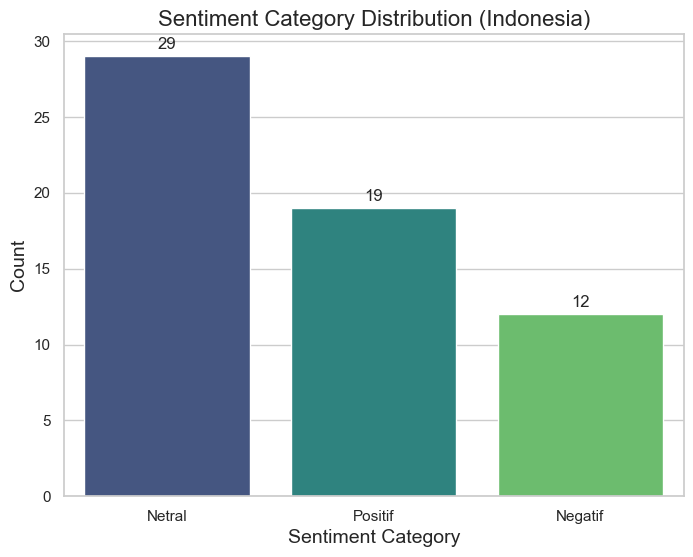

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot using seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts1.index, y=sentiment_counts1.values, palette='viridis')

# Add labels and title
plt.title('Sentiment Category Distribution (Indonesia)', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the values on top of the bars
for i in range(len(sentiment_counts1)):
    plt.text(i, sentiment_counts1.values[i] + 0.5, 
             sentiment_counts1.values[i], 
             ha='center', fontsize=12)

# Show the plot
plt.show()

#### Word Cloud (All and Based on Sentiment)

In [49]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


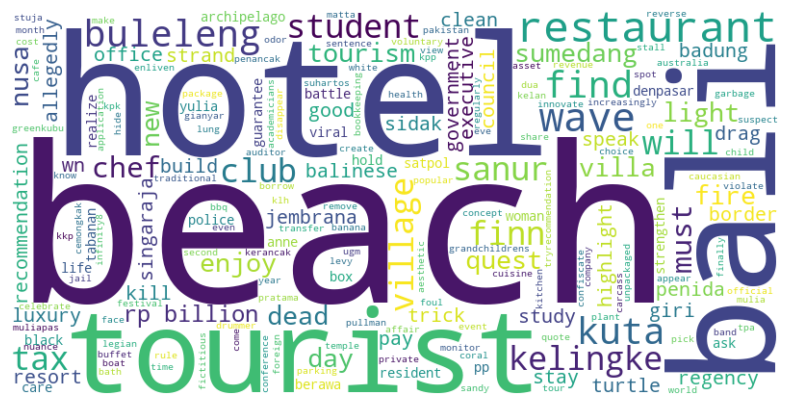

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text from the 'Churn_Reason' column into a single string
text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1['cleaned_title_translated'])

# Create a word cloud
wordcloud_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_inggris, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

Based on Sentiment

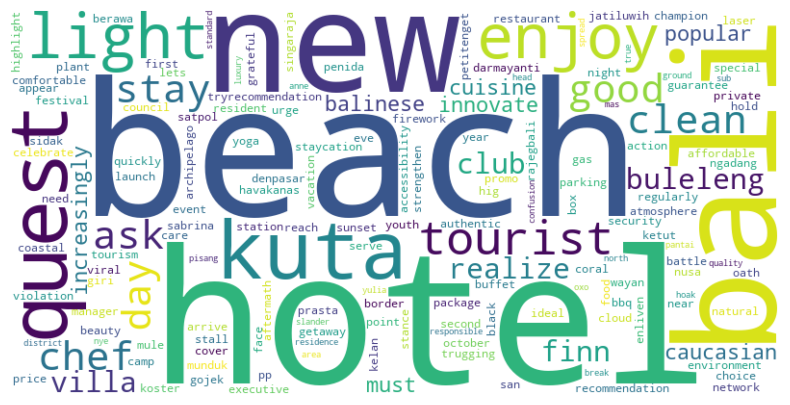

In [51]:
# Sentimen Positif
if data_sentiment1[data_sentiment1['sentiment_category_english'] == "Positif"].shape[0] != 0:
    data_sentiment1_positif = data_sentiment1[data_sentiment1['sentiment_category_english'] == "Positif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_positif['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_positif_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positif_inggris, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else:
    print("Tidak ada sentimen positif pada berita")

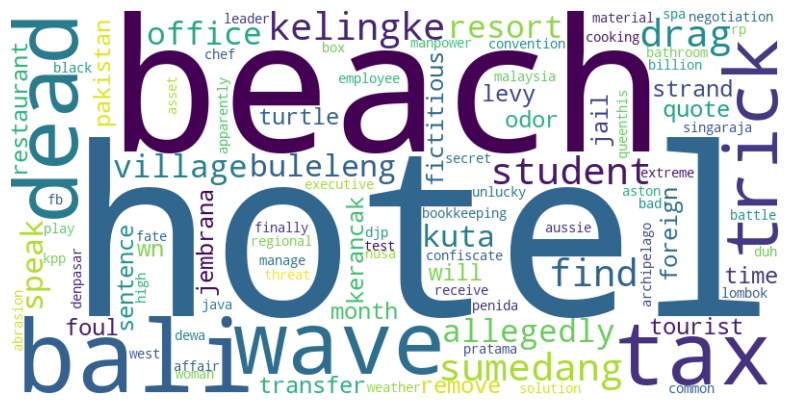

In [52]:
# Sentimen Negatif
if data_sentiment1[data_sentiment1['sentiment_category_english'] == "Negatif"].shape[0] != 0:
    data_sentiment1_negatif = data_sentiment1[data_sentiment1['sentiment_category_english'] == "Negatif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_negatif['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_negatif_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negatif_inggris, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen negatif pada berita")

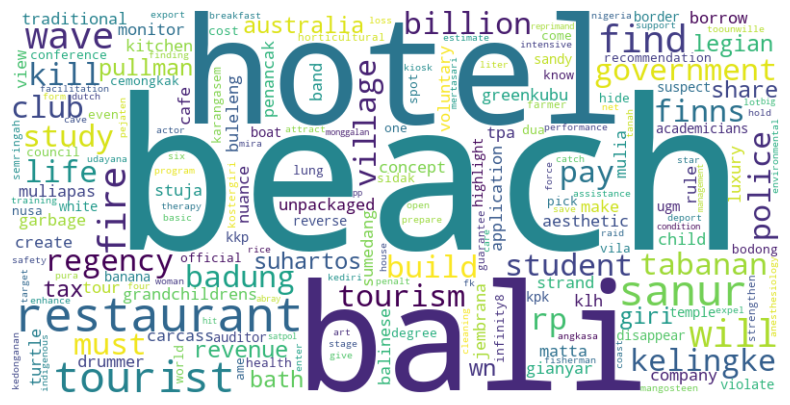

In [76]:
# Sentimen Netral
if data_sentiment1[data_sentiment1['sentiment_category_english'] == "Netral"].shape[0] != 0:
    data_sentiment1_netral = data_sentiment1[data_sentiment1['sentiment_category_english'] == "Netral"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_netral['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_netral_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_netral_inggris, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen netral pada berita")

### 2. VADER

#### Sentiment

In [54]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [55]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores with VADER
def get_sentiment_vader(text):
    # VADER provides a compound score which ranges from -1 (negative) to 1 (positive)
    score = sia.polarity_scores(text)['compound']
    return score

# Apply VADER to get the sentiment scores
data_sentiment1['sentiment_score_english_vader'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment_vader)

# Categorize sentiment with only 2 categories
def categorize_sentiment(score):
    if score > 0.05:  # Threshold for positive sentiment
        return 'Positif'
    elif score < -0.05:  # Threshold for negative sentiment
        return 'Negatif'
    else:
        return 'Netral'  # Scores between -0.05 and 0.05 considered neutral

data_sentiment1['sentiment_category_english_vader'] = data_sentiment1['sentiment_score_english_vader'].apply(categorize_sentiment)

C:\Users\asus\AppData\Local\Temp\ipykernel_31852\17249303.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_score_english_vader'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment_vader)
C:\Users\asus\AppData\Local\Temp\ipykernel_31852\17249303.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_category_english_vader'] = data_sentiment1['sentiment_score_english_vader'].apply(categorize_sentiment)


In [56]:
data_sentiment1.head()

keyword                                   title_translated  \
0   hotel  Balinese cuisine is increasingly popular with ...   
1   hotel  WN Australia Killed in a Pullman Legian Bali H...   
2   hotel  About hotel and restaurant tax revenue sharing...   
3   hotel  Suharto's grandchildren's company borrowed Rp....   
4   hotel  US $ 10 foreign tourist levies in Bali will be...   

                            cleaned_title_translated  sentiment_score_english  \
0  balinese cuisine be increasingly popular with ...                    0.600   
1  wn australia kill in a pullman legian bali hot...                    0.000   
2  about hotel and restaurant tax revenue share g...                    0.000   
3  suhartos grandchildrens company borrow rp 500 ...                    0.000   
4  we 10 foreign tourist levy in bali will be quo...                   -0.125   

  sentiment_category_english  sentiment_score_english_vader  \
0                    Positif                         0.7184   
1                     Netral                        -0.6908   
2                     Netral                         0.2960   
3                     Netral                         0.0000   
4                    Negatif                         0.0000   

  sentiment_category_english_vader  
0                          Positif  
1                          Negatif  
2                          Positif  
3                           Netral  
4                           Netral

In [57]:
sentiment_counts1_vader = data_sentiment1['sentiment_category_english_vader'].value_counts()
sentiment_counts1_vader

sentiment_category_english_vader
Positif    22
Negatif    19
Netral     19
Name: count, dtype: int64

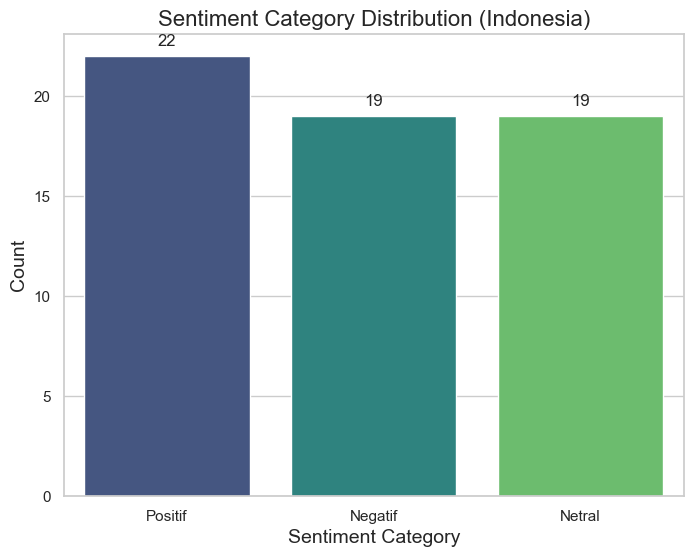

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot using seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts1_vader.index, y=sentiment_counts1_vader.values, palette='viridis')

# Add labels and title
plt.title('Sentiment Category Distribution (Indonesia)', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the values on top of the bars
for i in range(len(sentiment_counts1_vader)):
    plt.text(i, sentiment_counts1_vader.values[i] + 0.5, 
             sentiment_counts1_vader.values[i], 
             ha='center', fontsize=12)

# Show the plot
plt.show()

#### Word Cloud (Based on Sentiment Only)

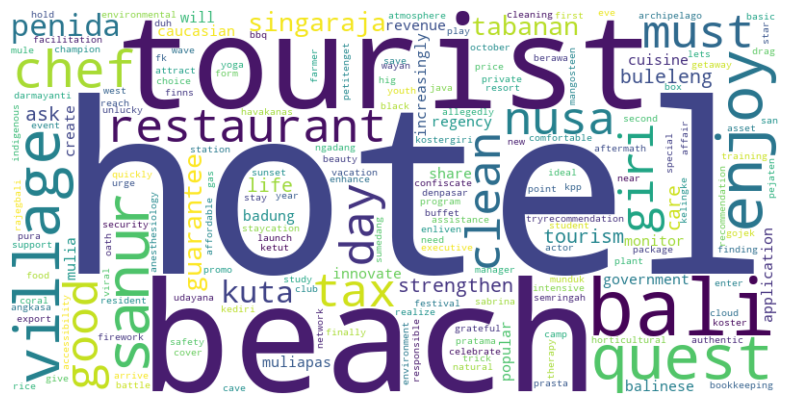

In [59]:
# Sentimen Positif
if data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Positif"].shape[0] != 0:
    data_sentiment1_positif_vader = data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Positif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_positif_vader['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_positif_inggris_vader = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positif_inggris_vader, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen positif pada berita")

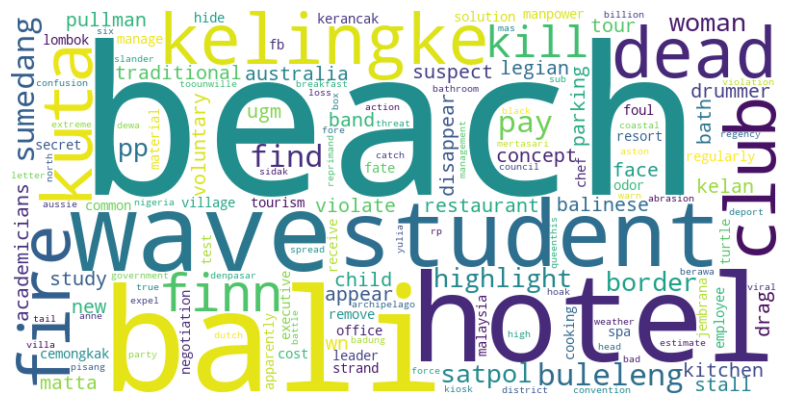

In [60]:
# Sentimen Negatif
if data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Negatif"].shape[0] != 0:
    data_sentiment1_negatif_vader = data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Negatif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_negatif_vader['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_negatif_inggris_vader = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negatif_inggris_vader, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen negatif pada berita")

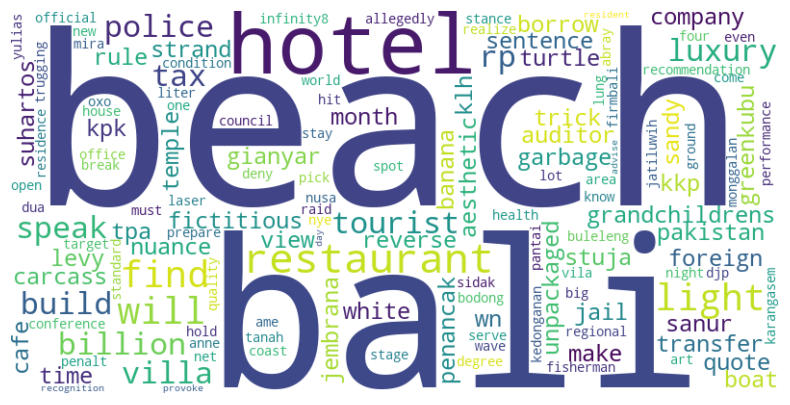

In [61]:
# Sentimen Netral
if data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Netral"].shape[0] != 0:
    data_sentiment1_netral_vader = data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Netral"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_netral_vader['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_netral_inggris_vader = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_netral_inggris_vader, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen netral pada berita")

### 3. IndoBERT

#### Sentiment

In [62]:
pip install transforms torch

Note: you may need to restart the kernel to use updated packages.


In [63]:
data_sentiment2 = data_ready[['keyword','title','cleaned_title','content']]
data_sentiment2

keyword                                              title  \
0       hotel  Masakan Bali Makin Digemari Bule, Chef Hotel B...   
1       hotel  WN Australia Tewas di Bak Mandi Hotel Pullman ...   
2       hotel  Soal Bagi Hasil Pajak Hotel dan Restoran, Giri...   
3       hotel  Perusahaan Cucu Soeharto Pinjam Duit Rp 500 M ...   
4       hotel  Pungutan Turis Asing US$ 10 di Bali Akan Dikut...   
5       hotel  KLH Akan Buat Aturan Sampah Hotel dan Restoran...   
6   wisatawan  Mulia-PAS Akan Buat Aplikasi 'Bali Mulia' untu...   
7    restoran  38 Kali Tipu Restoran dengan Transfer Fiktif, ...   
8    restoran    Greenkubu, Restoran Nuansa Alam di Gianyar Bali   
9    restoran  Wajib Dicoba! Rekomendasi Pilihan 11 Restoran ...   
10   restoran  Dapur Bali Mula: Restoran Tradisional di Bulel...   
11     pantai  Pelajar Sumedang yang Terseret Ombak Pantai Ke...   
12     pantai  Pelajar Tewas Terseret Ombak di Pantai Kelingk...   
13     pantai  Lagi, Bangkai Penyu Lekang Ditemukan Terdampar...   
14     pantai  Stuja di Pantai, Kafe Estetik di Bali dengan P...   
15     pantai  Siswa Studi Tur Asal Sumedang Hilang Terseret ...   
16     pantai  Akademisi UGM Soroti Finns Beach Club yang Did...   
17     pantai  Pantai Kelan Tampil dengan Wajah Baru, Warung ...   
18     pantai  Bersih Pantai dan Tanam Koral Ramaikan Hari Ke...   
19     pantai  Keluarkan Bau Busuk, Penyu Lekang Mati Terdamp...   
20     pantai  Banana Boat Auditor KPK dan KKP Terbalik di Pa...   
21     pantai  10 Rekomendasi Pantai Berpasir Putih di Nusa D...   
22     pantai  Pantai Cemongkak: Wisata Tersembunyi Tanpa Bia...   
23      hotel  Mengenal Lebih Dekat Infinity8, Salah Satu Off...   
24      hotel  Rayakan Malam Tahun Baru Bernuansa 80-an di Qu...   
25      hotel  Diduga Akal-akalan Urusan Pembukuan Pajak, akh...   
26      hotel  Perundingan Buntu di Disnaker Bali, Nasib Kary...   
27      hotel  Hotel Diduga Pengemplang  Pajak Rp 10 Miliar d...   
28      hotel  Gelar Sidak di Amed, Dewan Karangasem Temukan ...   
29      hotel  11 Executive Chefs & 10 F&B Leaders Bali- Lomb...   
30      hotel  Desak Ketut Darmayanti - Executive Chef Quest ...   
31      hotel  Nikmati Promo Spesial Hari Sumpah Pemuda di Ho...   
32      hotel  October Getaway: Staycation Nyaman, Harga Terj...   
33      hotel  Petani Hortikultura Tabanan Dijamin Semringah,...   
34      hotel  Terlalu! Ogah Bayar Sarapan di Hotel, Wanita B...   
35      hotel  Dewa Ratu! Perempuan Aussie Ini Ditemukan Meni...   
36      hotel  Yuk Tanya Sabrina Aja saat Butuh Rekomendasi H...   
37  wisatawan               Ancaman Cuaca Ekstrem di Pantai Kuta   
38  wisatawan  Tanah Lot Bakal Dibangun Panggung Pentas Seni ...   
39  wisatawan  Jurus Tarik Wisatawan Menginap di Jatiluwih : ...   
40  wisatawan  Menikmati Indahnya Suasana Alam Buleleng dari ...   
41  wisatawan  Prodi Anestesiologi & Terapi Intensif FK Udaya...   
42  wisatawan  Luncurkan #RajegBali, Gojek Perkuat Aksesibili...   
43  wisatawan  Gua di Desa Pejaten Kediri, Tabanan, Temuan Ta...   
44  wisatawan  Cita-cita Warga Buleleng Diwujudkan Wayan Kost...   
45     pantai  Enam Kios Pantai Mertasari Terbakar, Kerugian ...   
46     pantai    Nelayan Persiapkan  Jaring di Pantai Kedonganan   
47     pantai  Polisi Gelar Razia di Pantai Penimbangan, Temu...   
48     pantai  The Sanur dan Angkasa Pura Support bersama Des...   
49     pantai  Duh, Siswa Nahas Asal Sumedang, Jabar, Ini Ter...   
50     pantai  Peduli Lingkungan, Havaianas Gelar Bersih-Bers...   
51     pantai  Empat Rumah di Pesisir Pantai Monggalan Dihant...   
52     pantai  Dewan Sidak ke Finns Club, Soroti Pelanggaran ...   
53     pantai  Menikmati Sunset  Diselimuti Mendung di Pantai...   
54     pantai   Gelombang Tinggi, Abrasi Pantai Kuta Makin Parah   
55     pantai  Pemkab Badung Tegur Manajemen Finns Beach Club...   
56     pantai  Buntut Pesta Kembang Api Viral di Pantai Beraw...   
57     pantai  Ground Breaking Villa Mewah OXO The Residences.

In [64]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch

# Load the saved model and tokenizer
model_load_path = "C:/Users/asus/OneDrive/BPS/Neraca/smsa_bpsbali_indobert_model"  # The path where the model is saved
tokenizer_load_path = "C:/Users/asus/OneDrive/BPS/Neraca/smsa_bpsbali_indobert_tokenizer"  # The path where the tokenizer is saved

# Load the model and tokenizer
model = BertForSequenceClassification.from_pretrained(model_load_path)
tokenizer = BertTokenizer.from_pretrained(tokenizer_load_path)

In [65]:
from torch.nn.functional import softmax  # Softmax function to convert logits to probabilities

# Initialize an empty list to collect predictions
sentiment_predict = []
probabilities = []

# Loop through the cleaned titles
for text in data_sentiment2['cleaned_title']:
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

    # Make prediction
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradients for inference
        outputs = model(**inputs)

    # Get the logits (raw scores)
    logits = outputs.logits
    
    # Apply softmax to convert logits to probabilities
    probs = softmax(logits, dim=-1)  # Softmax along the class dimension (last dimension)

    # Get the predicted class (index of max logit)
    predicted_class = logits.argmax(dim=-1).item()

    # Get the probability of the predicted class
    predicted_prob = probs[0, predicted_class].item()

    # Convert prediction to string label
    if predicted_class == 0:
        sentiment_label = "positif"
    elif predicted_class == 1:
        sentiment_label = "netral"
    else:
        sentiment_label = "negatif"

    # Append the sentiment label and its probability
    sentiment_predict.append(sentiment_label)
    probabilities.append(predicted_prob)

# After the loop, create the DataFrame
sentiment_predict_df = pd.DataFrame({
    'sentiment': sentiment_predict,
    'probability': probabilities
})

# Add it as a new column to the original DataFrame
data_sentiment2['sentiment_score_indonesia'] = sentiment_predict_df['probability']
data_sentiment2['sentiment_category_indonesia'] = sentiment_predict_df['sentiment']

# Optionally, you can print the DataFrame to check the results
data_sentiment2


C:\Users\asus\AppData\Local\Temp\ipykernel_31852\1096017218.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment2['sentiment_score_indonesia'] = sentiment_predict_df['probability']
C:\Users\asus\AppData\Local\Temp\ipykernel_31852\1096017218.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment2['sentiment_category_indonesia'] = sentiment_predict_df['sentiment']


keyword                                              title  \
0       hotel  Masakan Bali Makin Digemari Bule, Chef Hotel B...   
1       hotel  WN Australia Tewas di Bak Mandi Hotel Pullman ...   
2       hotel  Soal Bagi Hasil Pajak Hotel dan Restoran, Giri...   
3       hotel  Perusahaan Cucu Soeharto Pinjam Duit Rp 500 M ...   
4       hotel  Pungutan Turis Asing US$ 10 di Bali Akan Dikut...   
5       hotel  KLH Akan Buat Aturan Sampah Hotel dan Restoran...   
6   wisatawan  Mulia-PAS Akan Buat Aplikasi 'Bali Mulia' untu...   
7    restoran  38 Kali Tipu Restoran dengan Transfer Fiktif, ...   
8    restoran    Greenkubu, Restoran Nuansa Alam di Gianyar Bali   
9    restoran  Wajib Dicoba! Rekomendasi Pilihan 11 Restoran ...   
10   restoran  Dapur Bali Mula: Restoran Tradisional di Bulel...   
11     pantai  Pelajar Sumedang yang Terseret Ombak Pantai Ke...   
12     pantai  Pelajar Tewas Terseret Ombak di Pantai Kelingk...   
13     pantai  Lagi, Bangkai Penyu Lekang Ditemukan Terdampar...   
14     pantai  Stuja di Pantai, Kafe Estetik di Bali dengan P...   
15     pantai  Siswa Studi Tur Asal Sumedang Hilang Terseret ...   
16     pantai  Akademisi UGM Soroti Finns Beach Club yang Did...   
17     pantai  Pantai Kelan Tampil dengan Wajah Baru, Warung ...   
18     pantai  Bersih Pantai dan Tanam Koral Ramaikan Hari Ke...   
19     pantai  Keluarkan Bau Busuk, Penyu Lekang Mati Terdamp...   
20     pantai  Banana Boat Auditor KPK dan KKP Terbalik di Pa...   
21     pantai  10 Rekomendasi Pantai Berpasir Putih di Nusa D...   
22     pantai  Pantai Cemongkak: Wisata Tersembunyi Tanpa Bia...   
23      hotel  Mengenal Lebih Dekat Infinity8, Salah Satu Off...   
24      hotel  Rayakan Malam Tahun Baru Bernuansa 80-an di Qu...   
25      hotel  Diduga Akal-akalan Urusan Pembukuan Pajak, akh...   
26      hotel  Perundingan Buntu di Disnaker Bali, Nasib Kary...   
27      hotel  Hotel Diduga Pengemplang  Pajak Rp 10 Miliar d...   
28      hotel  Gelar Sidak di Amed, Dewan Karangasem Temukan ...   
29      hotel  11 Executive Chefs & 10 F&B Leaders Bali- Lomb...   
30      hotel  Desak Ketut Darmayanti - Executive Chef Quest ...   
31      hotel  Nikmati Promo Spesial Hari Sumpah Pemuda di Ho...   
32      hotel  October Getaway: Staycation Nyaman, Harga Terj...   
33      hotel  Petani Hortikultura Tabanan Dijamin Semringah,...   
34      hotel  Terlalu! Ogah Bayar Sarapan di Hotel, Wanita B...   
35      hotel  Dewa Ratu! Perempuan Aussie Ini Ditemukan Meni...   
36      hotel  Yuk Tanya Sabrina Aja saat Butuh Rekomendasi H...   
37  wisatawan               Ancaman Cuaca Ekstrem di Pantai Kuta   
38  wisatawan  Tanah Lot Bakal Dibangun Panggung Pentas Seni ...   
39  wisatawan  Jurus Tarik Wisatawan Menginap di Jatiluwih : ...   
40  wisatawan  Menikmati Indahnya Suasana Alam Buleleng dari ...   
41  wisatawan  Prodi Anestesiologi & Terapi Intensif FK Udaya...   
42  wisatawan  Luncurkan #RajegBali, Gojek Perkuat Aksesibili...   
43  wisatawan  Gua di Desa Pejaten Kediri, Tabanan, Temuan Ta...   
44  wisatawan  Cita-cita Warga Buleleng Diwujudkan Wayan Kost...   
45     pantai  Enam Kios Pantai Mertasari Terbakar, Kerugian ...   
46     pantai    Nelayan Persiapkan  Jaring di Pantai Kedonganan   
47     pantai  Polisi Gelar Razia di Pantai Penimbangan, Temu...   
48     pantai  The Sanur dan Angkasa Pura Support bersama Des...   
49     pantai  Duh, Siswa Nahas Asal Sumedang, Jabar, Ini Ter...   
50     pantai  Peduli Lingkungan, Havaianas Gelar Bersih-Bers...   
51     pantai  Empat Rumah di Pesisir Pantai Monggalan Dihant...   
52     pantai  Dewan Sidak ke Finns Club, Soroti Pelanggaran ...   
53     pantai  Menikmati Sunset  Diselimuti Mendung di Pantai...   
54     pantai   Gelombang Tinggi, Abrasi Pantai Kuta Makin Parah   
55     pantai  Pemkab Badung Tegur Manajemen Finns Beach Club...   
56     pantai  Buntut Pesta Kembang Api Viral di Pantai Beraw...   
57     pantai  Ground Breaking Villa Mewah OXO The Residences.

In [66]:
sentiment_counts2 = data_sentiment2['sentiment_category_indonesia'].value_counts()
sentiment_counts2

sentiment_category_indonesia
netral     38
positif    16
negatif     6
Name: count, dtype: int64

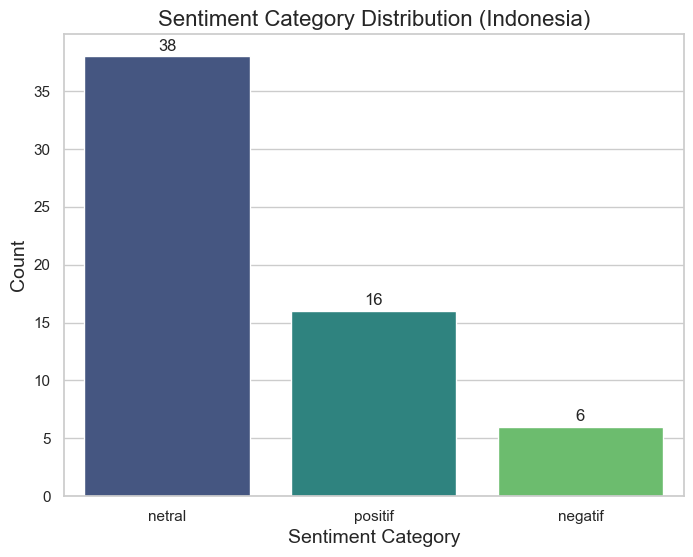

In [67]:
import seaborn as sns

# Set the style of the plot using seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts2.index, y=sentiment_counts2.values, palette='viridis')

# Add labels and title
plt.title('Sentiment Category Distribution (Indonesia)', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the values on top of the bars
for i in range(len(sentiment_counts2)):
    plt.text(i, sentiment_counts2.values[i] + 0.5, 
             sentiment_counts2.values[i], 
             ha='center', fontsize=12)

# Show the plot
plt.show()

#### Word Cloud (All and Based on Sentiment)

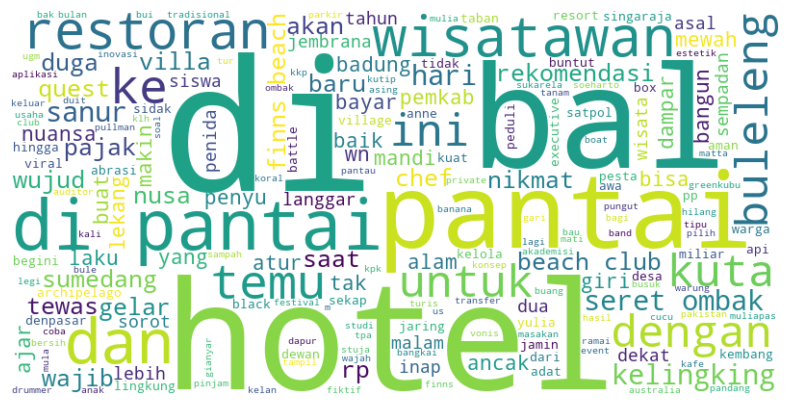

In [68]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text from the 'Churn_Reason' column into a single string
text = " ".join(cleaned_title for cleaned_title in data_sentiment2['cleaned_title'])

# Create a word cloud
wordcloud_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_indonesia, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

Based on Sentiment

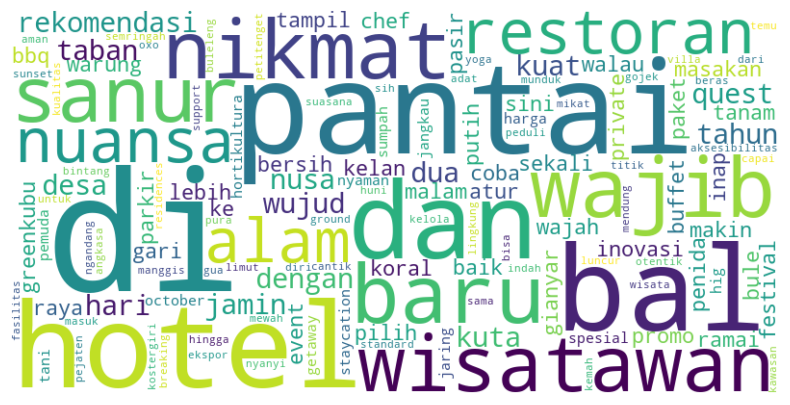

In [69]:
# Sentimen Positif
if data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "positif"].shape[0] != 0:
    data_sentiment2_positif = data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "positif"]

    text = " ".join(cleaned_title for cleaned_title in data_sentiment2_positif['cleaned_title'])

    # Create a word cloud
    wordcloud_positif_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positif_indonesia, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen positif pada berita")

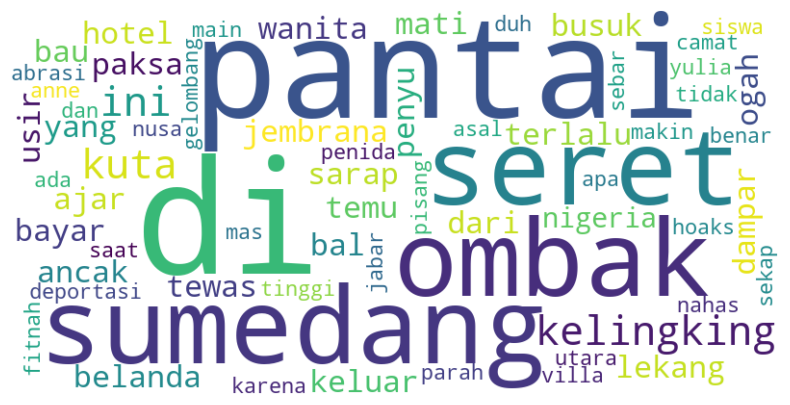

In [70]:
# Sentimen Negatif
if data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "negatif"].shape[0] != 0:
    data_sentiment2_negatif = data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "negatif"]

    text = " ".join(cleaned_title for cleaned_title in data_sentiment2_negatif['cleaned_title'])

    # Create a word cloud
    wordcloud_negatif_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negatif_indonesia, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen negatif pada berita")

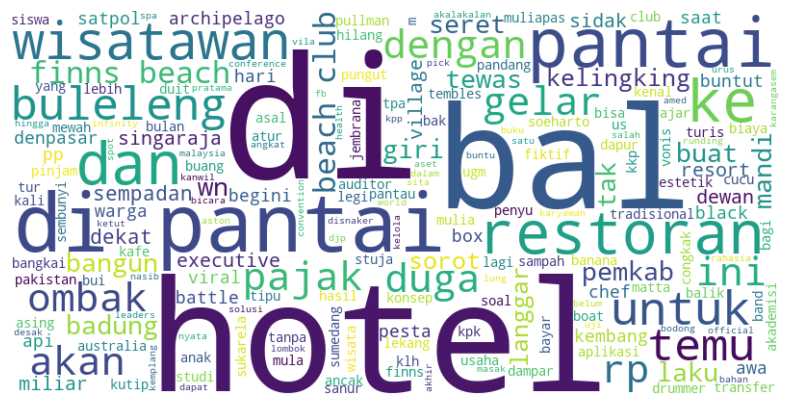

In [71]:
# Sentimen Netral
if data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "netral"].shape[0] != 0:
    data_sentiment2_netral = data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "netral"]

    text = " ".join(cleaned_title for cleaned_title in data_sentiment2_netral['cleaned_title'])

    # Create a word cloud
    wordcloud_netral_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_netral_indonesia, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen netral pada berita")

### Export Result

In [72]:
print(data_sentiment1.shape)
data_sentiment1.head()

(60, 7)


keyword                                   title_translated  \
0   hotel  Balinese cuisine is increasingly popular with ...   
1   hotel  WN Australia Killed in a Pullman Legian Bali H...   
2   hotel  About hotel and restaurant tax revenue sharing...   
3   hotel  Suharto's grandchildren's company borrowed Rp....   
4   hotel  US $ 10 foreign tourist levies in Bali will be...   

                            cleaned_title_translated  sentiment_score_english  \
0  balinese cuisine be increasingly popular with ...                    0.600   
1  wn australia kill in a pullman legian bali hot...                    0.000   
2  about hotel and restaurant tax revenue share g...                    0.000   
3  suhartos grandchildrens company borrow rp 500 ...                    0.000   
4  we 10 foreign tourist levy in bali will be quo...                   -0.125   

  sentiment_category_english  sentiment_score_english_vader  \
0                    Positif                         0.7184   
1                     Netral                        -0.6908   
2                     Netral                         0.2960   
3                     Netral                         0.0000   
4                    Negatif                         0.0000   

  sentiment_category_english_vader  
0                          Positif  
1                          Negatif  
2                          Positif  
3                           Netral  
4                           Netral

In [73]:
print(data_sentiment2.shape)
data_sentiment2.head()

(60, 6)


keyword                                              title  \
0   hotel  Masakan Bali Makin Digemari Bule, Chef Hotel B...   
1   hotel  WN Australia Tewas di Bak Mandi Hotel Pullman ...   
2   hotel  Soal Bagi Hasil Pajak Hotel dan Restoran, Giri...   
3   hotel  Perusahaan Cucu Soeharto Pinjam Duit Rp 500 M ...   
4   hotel  Pungutan Turis Asing US$ 10 di Bali Akan Dikut...   

                                       cleaned_title  \
0     masakan bal makin gari bule chef hotel inovasi   
1  wn australia tewas di bak mandi hotel pullman ...   
2  soal bagi hasil pajak hotel dan restoran giri ...   
3  usaha cucu soeharto pinjam duit rp m untuk ban...   
4   pungut turis asing us di bal akan kutip di hotel   

                                             content  \
0  Masakan nusantara, termasuk masakan Bali, bela...   
1  Warga negara asing (WNA) asal Australia, Pauli...   
2  Calon wakil gubernur Bali nomor urut 2 I Nyoma...   
3  PT Intra Golflink Resorts Tbk (GOLF) melalui a...   
4  Pungutan turis asing sebesar Rp 150 ribu atau ...   

   sentiment_score_indonesia sentiment_category_indonesia  
0                   0.934655                      positif  
1                   0.992355                       netral  
2                   0.995333                       netral  
3                   0.994826                       netral  
4                   0.993864                       netral

In [74]:
# Assigning columns individually
sentiment_result = data_sentiment2.copy()  # Copy data_sentiment2 to avoid modifying the original

# Assign columns from data_sentiment1 to sentiment_result
sentiment_result['title_translated'] = data_sentiment1['title_translated']
sentiment_result['cleaned_title_translated'] = data_sentiment1['cleaned_title_translated']
sentiment_result['sentiment_category_english'] = data_sentiment1['sentiment_category_english']
sentiment_result['sentiment_score_english'] = data_sentiment1['sentiment_score_english']
sentiment_result['sentiment_category_english_vader'] = data_sentiment1['sentiment_category_english_vader']
sentiment_result['sentiment_score_english_vader'] = data_sentiment1['sentiment_score_english_vader']

print(sentiment_result.shape)
sentiment_result.head()

(60, 12)


keyword                                              title  \
0   hotel  Masakan Bali Makin Digemari Bule, Chef Hotel B...   
1   hotel  WN Australia Tewas di Bak Mandi Hotel Pullman ...   
2   hotel  Soal Bagi Hasil Pajak Hotel dan Restoran, Giri...   
3   hotel  Perusahaan Cucu Soeharto Pinjam Duit Rp 500 M ...   
4   hotel  Pungutan Turis Asing US$ 10 di Bali Akan Dikut...   

                                       cleaned_title  \
0     masakan bal makin gari bule chef hotel inovasi   
1  wn australia tewas di bak mandi hotel pullman ...   
2  soal bagi hasil pajak hotel dan restoran giri ...   
3  usaha cucu soeharto pinjam duit rp m untuk ban...   
4   pungut turis asing us di bal akan kutip di hotel   

                                             content  \
0  Masakan nusantara, termasuk masakan Bali, bela...   
1  Warga negara asing (WNA) asal Australia, Pauli...   
2  Calon wakil gubernur Bali nomor urut 2 I Nyoma...   
3  PT Intra Golflink Resorts Tbk (GOLF) melalui a...   
4  Pungutan turis asing sebesar Rp 150 ribu atau ...   

   sentiment_score_indonesia sentiment_category_indonesia  \
0                   0.934655                      positif   
1                   0.992355                       netral   
2                   0.995333                       netral   
3                   0.994826                       netral   
4                   0.993864                       netral   

                                    title_translated  \
0  Balinese cuisine is increasingly popular with ...   
1  WN Australia Killed in a Pullman Legian Bali H...   
2  About hotel and restaurant tax revenue sharing...   
3  Suharto's grandchildren's company borrowed Rp....   
4  US $ 10 foreign tourist levies in Bali will be...   

                            cleaned_title_translated  \
0  balinese cuisine be increasingly popular with ...   
1  wn australia kill in a pullman legian bali hot...   
2  about hotel and restaurant tax revenue share g...   
3  suhartos grandchildrens company borrow rp 500 ...   
4  we 10 foreign tourist levy in bali will be quo...   

  sentiment_category_english  sentiment_score_english  \
0                    Positif                    0.600   
1                     Netral                    0.000   
2                     Netral                    0.000   
3                     Netral                    0.000   
4                    Negatif                   -0.125   

  sentiment_category_english_vader  sentiment_score_english_vader  
0                          Positif                         0.7184  
1                          Negatif                        -0.6908  
2                          Positif                         0.2960  
3                           Netral                         0.0000  
4                           Netral                         0.0000

In [75]:
sentiment_result.to_excel("C:/Users/asus/OneDrive/BPS/Neraca/sentimentresult_sektor9_triwulan4_bali.xlsx")